### 탐색적 데이터 분석(데이터 문제점, 데이터 통계, 데이터 시각화)

In [16]:
import pandas as pd

df = pd.read_csv("phishing_total.csv")


In [ ]:
unique_types = df["phishing_type"].unique()
print(unique_types)

['기관사칭형' '세금환급형' '대출빙자형' '기타' '가족지인사칭형' '투자권유형'
 '대화 내용을 바탕으로 가장 적합한 유형은 "대출빙자형"입니다.' '대화 내용을 바탕으로 가장 적합한 유형은 "기관사칭형"입니다.'
 '메신저피싱형' '콜백스미싱형' '대포통장모집형' '대포통장형'
 '대화 내용에 "100만원 이상"이라는 금액이 언급되어 있어 대출이나 금융 관련 사기일 가능성이 높습니다. 따라서 가장 적합한 유형은 "대출빙자형"입니다.'
 '대화 내용을 바탕으로 적합한 유형을 선택할 수 있는 정보가 부족합니다. 파일 이름에 명확한 키워드도 없으므로, 대화 내용만으로는 유형을 결정하기 어렵습니다. 추가적인 정보가 필요합니다.'
 '납치빙자형' '택배사칭형' '대포통장'
 '대화 내용만으로는 보이스피싱 유형을 정확히 분류하기 어렵습니다. 파일 이름에 명확한 키워드가 없으므로 대화 내용만으로는 판단할 수 없습니다. 추가 정보가 필요합니다.'
 '마스킹']


In [18]:
import pandas as pd

try:
    df_original = pd.read_csv("phishing_total.csv")
    df_modified = pd.read_csv("phishing_others.csv")

except FileNotFoundError as e:
    print(f"오류: {e.filename} 파일을 찾을 수 없습니다. 파일명을 확인해주세요.")
    exit()

In [19]:
main_types = [
    "기관사칭형",
    "대출빙자형",
    "메신저피싱형",
    "택배사칭형",
    "투자권유형",
    "가족지인사칭형",
    "세금환급형",
    "콜백스미싱형",
]

# df_original의 'phishing_type'이 main_types 리스트에 포함된 행만 남깁니다.
df_cleaned_original = df_original[df_original["phishing_type"].isin(main_types)]

In [20]:
# pd.concat을 사용하여 두 데이터프레임을 위아래로 합칩니다.
df_final = pd.concat([df_cleaned_original, df_modified], ignore_index=True)

# ignore_index=True는 기존 인덱스를 무시하고 새로 0부터 부여하는 옵션입니다.

In [22]:
print("--- 저장 전 최종 데이터의 phishing_type 종류 및 개수 ---")
print(df_final["phishing_type"].value_counts())

print("\nunique:")
print(df_final["phishing_type"].unique())

--- 저장 전 최종 데이터의 phishing_type 종류 및 개수 ---
phishing_type
기관사칭형      27741
대출빙자형      10734
가족지인사칭형     1458
메신저피싱형      1137
투자권유형        892
택배사칭형        876
세금환급형        861
콜백스미싱형       820
Name: count, dtype: int64

unique:
['기관사칭형' '세금환급형' '대출빙자형' '가족지인사칭형' '투자권유형' '메신저피싱형' '콜백스미싱형' '택배사칭형']


In [23]:
total_rows = len(df_final)
print(f"\n--- 전체 행의 개수 ---")
print(f"총 {total_rows}개의 행이 있습니다.")


--- 전체 행의 개수 ---
총 44519개의 행이 있습니다.


In [32]:
df_final.tail(5)

,file_name,phishing_type,speaker,text
44514,phishing_1849,기관사칭형,0,첨단범죄수 2부입니다.
44515,phishing_1849,기관사칭형,0,첨단 범죄 수사 2부에 이 이경우요.
44516,phishing_1849,기관사칭형,1,"이 경우요? 예, 종지 사장이라고 하지 않았나요? 뭐라고요? 정식 차장이라고 하지 ..."
44517,phishing_1849,기관사칭형,0,이경호 계장입니다. 이경호.
44518,phishing_1849,기관사칭형,1,"계장이요? 네, 알겠습니다 예."


### 행을 기준으로 한 피싱 유형별 비율

In [26]:
type_percentage = df_final["phishing_type"].value_counts(normalize=True) * 100
print("\n--- 피싱 유형별 비율 (%) ---")
print(type_percentage)


--- 피싱 유형별 비율 (%) ---
phishing_type
기관사칭형      62.312720
대출빙자형      24.111054
가족지인사칭형     3.275006
메신저피싱형      2.553966
투자권유형       2.003639
택배사칭형       1.967699
세금환급형       1.934006
콜백스미싱형      1.841910
Name: proportion, dtype: float64


### file_name이 같은 행은 1개의 데이터로 간주해 피싱유형 비율 통계, 시각화

In [ ]:
file_path = "phishing_data.csv"
try:
    df = pd.read_csv(file_path)
    print("데이터 불러오기 성공!")
    print(f"전체 데이터 행 개수: {len(df)}개")
    print("-" * 30)

except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    # 파일이 없을 경우 코드 실행 중단
    exit()

# 'file_name' 기준으로 중복 행 제거하기
# 'file_name'이 같은 데이터는 하나로 간주하기 위한 핵심 단계입니다.
df_unique = df.drop_duplicates(subset="file_name", keep="first").copy()
print("'file_name' 기준 중복 제거 완료!")
print(f"고유 파일 개수 (총 개수): {len(df_unique)}개")
print("-" * 30)


# 피싱 유형별 개수 및 비율 계산하기
# 개수 계산
type_counts = df_unique["phishing_type"].value_counts()

# 비율(%) 계산
type_percentage = df_unique["phishing_type"].value_counts(normalize=True) * 100


# 최종 결과 정리하여 출력하기
# 위에서 계산한 개수와 비율을 하나의 표(DataFrame)로 합칩니다.
summary_df = pd.DataFrame(
    {
        "개수": type_counts,
        "비율(%)": type_percentage.round(2),  # 소수점 둘째 자리까지 표시
    }
)

print("최종 분석 결과 (고유 파일 기준)")
print(summary_df)

데이터 불러오기 성공!
전체 데이터 행 개수: 44519개
------------------------------
'file_name' 기준 중복 제거 완료!
고유 파일 개수 (총 개수): 2047개
------------------------------
최종 분석 결과 (고유 파일 기준)
                개수  비율(%)
phishing_type            
기관사칭형          857  41.87
대출빙자형          431  21.06
메신저피싱형         168   8.21
택배사칭형          161   7.87
가족지인사칭형        125   6.11
콜백스미싱형         109   5.32
세금환급형          105   5.13
투자권유형           91   4.45


'phishing_type_barchart.png' 파일로 그래프를 저장했습니다.


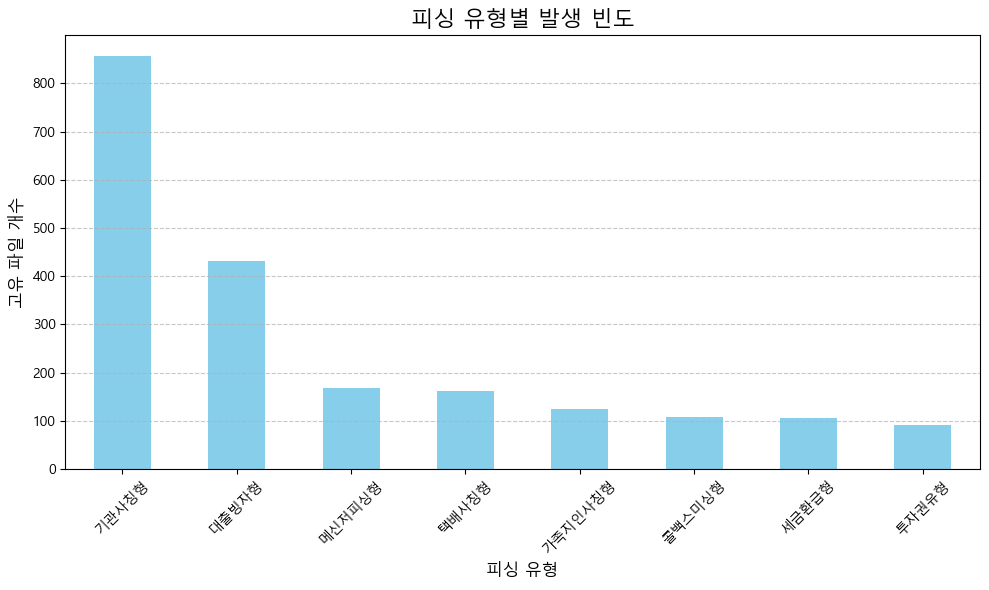

In [6]:
import matplotlib.pyplot as plt
import platform

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

# 데이터를 개수 기준으로 정렬
sorted_counts = type_counts.sort_values(ascending=False)

# 막대그래프 생성
sorted_counts.plot(kind="bar", figsize=(10, 6), rot=45, color="skyblue")

# 그래프 제목 및 라벨 추가
plt.title("피싱 유형별 발생 빈도", fontsize=16)
plt.xlabel("피싱 유형", fontsize=12)
plt.ylabel("고유 파일 개수", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# 그래프를 이미지 파일로 저장
plt.savefig("phishing_type_barchart.png")

print("'phishing_type_barchart.png' 파일로 그래프를 저장했습니다.")

'phishing_type_piechart.png' 파일로 파이 차트를 저장했습니다.


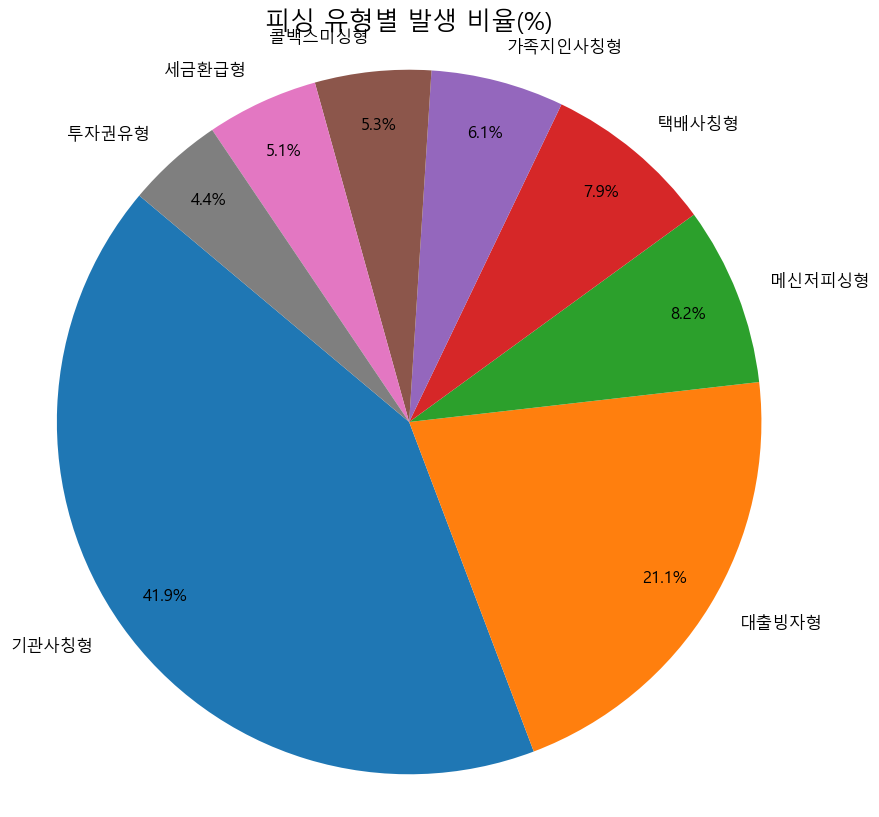

In [7]:
plt.figure(figsize=(10, 10))  
plt.pie(
    type_percentage,
    labels=type_percentage.index,  # 각 파이 조각의 라벨
    autopct="%.1f%%",  # 파이 조각에 퍼센트 값을 소수점 첫째 자리까지 표시
    startangle=140,  # 첫 번째 조각의 시작 각도
    pctdistance=0.85,  # 퍼센트 텍스트의 위치
    textprops={"fontsize": 12},  # 라벨 폰트 크기
)

# 그래프 제목 추가 및 형태 조절
plt.title("피싱 유형별 발생 비율(%)", fontsize=18)
plt.axis("equal")  # 파이 차트를 완전한 원 형태로 만듭니다.


# 그래프를 이미지 파일로 저장
plt.savefig("phishing_type_piechart.png")

print("'phishing_type_piechart.png' 파일로 파이 차트를 저장했습니다.")

### 데이터 중복 확인 작업

In [ ]:
df_long_text = df_final[df_final["text"].str.len() >= 10]

# keep=False 옵션은 중복된 모든 항목을 True로 표시합니다. (원본, 복사본 모두)
duplicates = df_long_text[df_long_text["text"].duplicated(keep=False)]

# 맨 왼쪽의 숫자(인덱스)를 확인하여 삭제할 행을 결정해야 합니다.
print("--- 10자 이상 중복되는 내용 및 해당 행 ---")
print(duplicates.sort_values(by="text"))

--- 10자 이상 중복되는 내용 및 해당 행 ---
          file_name phishing_type  speaker                  text
32189  phishing_220        콜백스미싱형        0          OOO님, 안녕하세요?
32456  phishing_263        콜백스미싱형        0          OOO님, 안녕하세요?
32324  phishing_242        콜백스미싱형        1          네, 그런데 누구세요?
32543  phishing_276        콜백스미싱형        1          네, 그런데 누구세요?
32519  phishing_272        콜백스미싱형        1          네, 그런데 누구세요?
...             ...           ...      ...                   ...
31951  phishing_181         세금환급형        1   환급 받으려면 어떻게 해야 하나요?
31541  phishing_112         세금환급형        1   환급 받으려면 어떻게 해야 하나요?
31915  phishing_175         세금환급형        1  환급을 받으려면 어떻게 해야 하나요?
31884  phishing_170         세금환급형        1  환급을 받으려면 어떻게 해야 하나요?
31725  phishing_143         세금환급형        1  환급을 받으려면 어떻게 해야 하나요?

[1414 rows x 4 columns]


### 데이터 기술 통계(file_name 기준)

In [ ]:
import re
from collections import Counter
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

# 데터 불러오기
try:
    df = pd.read_csv("phishing_data.csv")
except FileNotFoundError:
    print("'phishing_data.csv' 파일을 찾을 수 없습니다.")
    exit()


# 텍스트 정제: 한글, 영어, 숫자, 공백을 제외한 모든 문자 제거
# 정규표현식을 사용하여 정제하는 함수를 정의합니다.
def clean_text(text):
    # text가 문자열이 아닌 경우 str()로 변환합니다.
    text = str(text)
    # ^가-힣a-zA-Z0-9\s 는 한글, 영어, 숫자, 공백이 아닌 모든 것을 의미합니다.
    return re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text)


# 'text' 컬럼에 clean_text 함수를 적용하여 'text_cleaned'라는 새 컬럼을 만듭니다.
df["text_cleaned"] = df["text"].apply(clean_text)

print("텍스트 정제 완료. 'text_cleaned' 컬럼 생성됨.")
print(df[["text", "text_cleaned"]].head())

텍스트 정제 완료. 'text_cleaned' 컬럼 생성됨.
                                     text  \
0                       아빠? 목소리가 좀 이상한데요.   
1                         무슨 일인데 그렇게 급해요?   
2  아빠 핸드폰이 고장 나서 친구 폰으로 걸었어. 급하게 돈이 필요해서.   
3      교통사고가 나서 병원비가 필요해. 믿고 바로 보내줄 수 있지?   
4                      여보세요, OOO야. 나 아빠야.   

                           text_cleaned  
0                       아빠 목소리가 좀 이상한데요  
1                        무슨 일인데 그렇게 급해요  
2  아빠 핸드폰이 고장 나서 친구 폰으로 걸었어 급하게 돈이 필요해서  
3      교통사고가 나서 병원비가 필요해 믿고 바로 보내줄 수 있지  
4                       여보세요 OOO야 나 아빠야  


In [ ]:
# 글자 수, 단어 수 컬럼 추가
df["text_length"] = df["text_cleaned"].str.len()
df["word_count"] = df["text_cleaned"].str.split().str.len()

# 기술 통계 출력
print("\n--- 개별 메시지 단위의 길이 및 단어 수 기술 통계 ---")
# .describe()로 평균, 표준편차, 최소/최대값 등을 한 번에 확인
print(df[["text_length", "word_count"]].describe())


--- 개별 메시지 단위의 길이 및 단어 수 기술 통계 ---
        text_length    word_count
count  44519.000000  44519.000000
mean      34.136571      9.201757
std       31.607000      8.319464
min        0.000000      0.000000
25%       13.000000      4.000000
50%       30.000000      8.000000
75%       49.000000     13.000000
max      693.000000    186.000000


In [ ]:
# file_name 기준으로 그룹화하고, 정제된 텍스트를 하나의 문자열로 합칩니다.
# agg() 함수를 사용하여 그룹별로 집계 작업을 수행합니다.
df_docs = (
    df.groupby("file_name").agg(full_text=("text_cleaned", " ".join)).reset_index()
)

# 그룹별 글자 수, 단어 수 컬럼 추가
df_docs["doc_length"] = df_docs["full_text"].str.len()
df_docs["doc_word_count"] = df_docs["full_text"].str.split().str.len()

# 그룹별 기술 통계 출력
print("\n--- 문서(file_name) 단위의 길이 및 단어 수 기술 통계 ---")
print(df_docs[["doc_length", "doc_word_count"]].describe())


--- 문서(file_name) 단위의 길이 및 단어 수 기술 통계 ---
         doc_length  doc_word_count
count   2047.000000     2047.000000
mean     763.164631      200.123596
std     1848.799051      497.310067
min       20.000000        3.000000
25%      111.500000       27.000000
50%      178.000000       42.000000
75%      484.000000      127.000000
max    22961.000000     6129.000000


### 불용어 제거

In [49]:
# 1. 형태소 분석기 및 불용어 정의
okt = Okt()
# 분석에 의미가 없는 단어들을 리스트로 정의합니다. 필요에 따라 추가/삭제하세요.
stopwords = [
    "의",
    "가",
    "이",
    "은",
    "들",
    "는",
    "좀",
    "잘",
    "걍",
    "과",
    "도",
    "를",
    "으로",
    "자",
    "에",
    "와",
    "한",
    "하다",
    "그",
    "저",
    "것",
    "데",
    "수",
    "거",
    "보",
    "아",
    "나",
    "지금",
    "이거",
    "그거",
]

# 2. 전체 텍스트를 하나의 큰 문자열로 합칩니다.
corpus = " ".join(df_docs["full_text"])

# 3. 형태소 분석(명사 추출) 및 불용어 제거
# okt.nouns()를 사용하면 명사만 추출할 수 있습니다.
nouns = okt.nouns(corpus)
# 한 글자 단어와 불용어를 제외합니다.
meaningful_words = [word for word in nouns if len(word) > 1 and word not in stopwords]

# 4. 단어 빈도 계산
word_counts = Counter(meaningful_words)

# 5. 고유 어휘 수 및 가장 많이 나온 단어 20개 출력
print(f"\n--- 어휘 분석 결과 ---")
print(f"총 고유 어휘(명사) 수: {len(word_counts)}개")
print("\n가장 많이 사용된 단어 TOP 20:")
print(word_counts.most_common(20))


--- 어휘 분석 결과 ---
총 고유 어휘(명사) 수: 8453개

가장 많이 사용된 단어 TOP 20:
[('본인', 5755), ('저희', 4177), ('이제', 3646), ('고객', 3450), ('확인', 3409), ('통장', 2799), ('계좌', 2749), ('부분', 2140), ('말씀', 2069), ('은행', 2018), ('일단', 1898), ('연락', 1897), ('사건', 1817), ('때문', 1729), ('전화', 1642), ('진행', 1579), ('사용', 1508), ('금융', 1464), ('대출', 1386), ('조사', 1369)]



단어 빈도 막대그래프 저장 완료: top_20_words_barchart.png
워드클라우드 저장 완료: wordcloud.png


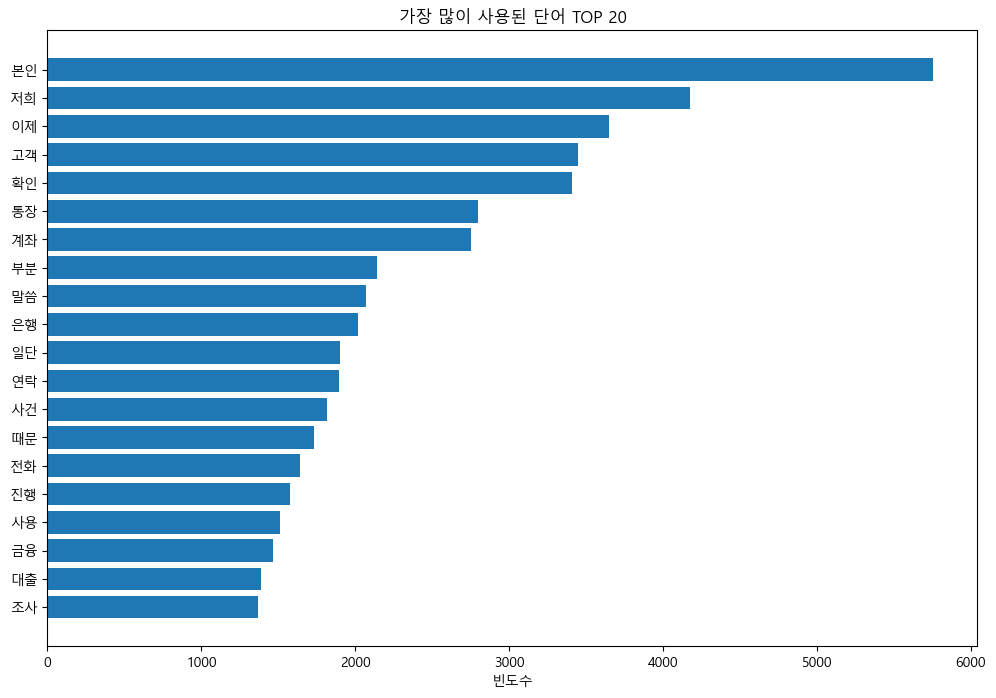

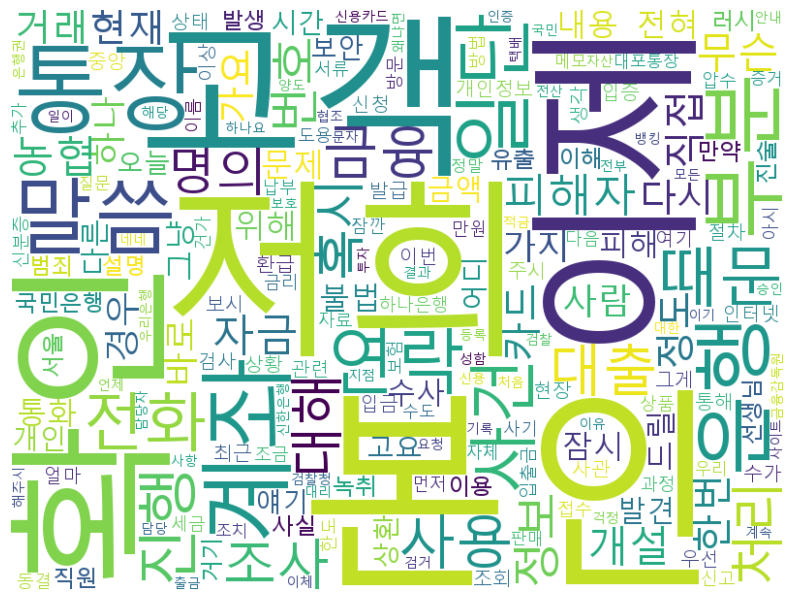

In [50]:
# 한글 폰트 설정 (Windows, Mac에 따라 자동으로 설정)
if platform.system() == "Windows":
    path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":  # Mac OS
    path = "/System/Library/Fonts/AppleGothic.ttf"
else:
    # Linux의 경우, 나눔고딕 등 설치된 한글 폰트 경로를 지정해야 합니다.
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    print("Warning: Linux에서 한글 폰트 경로를 확인하고 수정해야 할 수 있습니다.")

plt.rc("font", family="Malgun Gothic")  # Windows 기준
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지


# 1. 상위 20개 단어 막대그래프 시각화
top_20_words = word_counts.most_common(20)
# Counter 결과를 DataFrame으로 변환
df_word_counts = pd.DataFrame(top_20_words, columns=["word", "count"])

plt.figure(figsize=(12, 8))
plt.barh(df_word_counts["word"], df_word_counts["count"])
plt.gca().invert_yaxis()  # 빈도가 높은 단어가 위로 오도록 정렬
plt.title("가장 많이 사용된 단어 TOP 20")
plt.xlabel("빈도수")
plt.savefig("top_20_words_barchart.png")  # 그래프를 이미지 파일로 저장
print("\n단어 빈도 막대그래프 저장 완료: top_20_words_barchart.png")


# 2. 워드클라우드 시각화
wc = WordCloud(font_path=path, background_color="white", width=800, height=600)
cloud = wc.generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud.png")
print("워드클라우드 저장 완료: wordcloud.png")


단어 빈도 원그래프 저장 완료: top_10_words_piechart.png


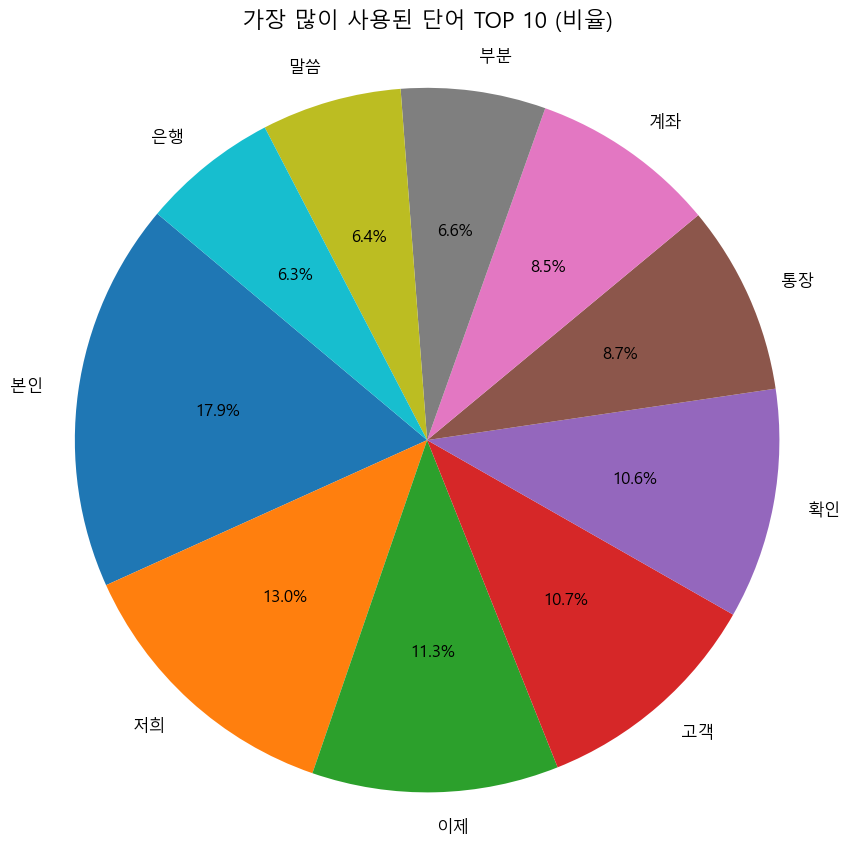

In [51]:
# 2. 시각화할 데이터 준비
top_10_words = word_counts.most_common(10)
labels = [word for word, count in top_10_words]
sizes = [count for word, count in top_10_words]

# 3. 원그래프 생성 및 저장
plt.figure(figsize=(10, 10))  # 그래프 크기 지정
plt.pie(
    sizes, labels=labels, autopct="%1.1f%%", startangle=140, textprops={"fontsize": 12}
)
plt.axis("equal")  # 원그래프를 원형으로 유지
plt.title("가장 많이 사용된 단어 TOP 10 (비율)", pad=20, fontsize=16)
plt.savefig("top_10_words_piechart.png")  # 그래프를 이미지 파일로 저장

print("\n단어 빈도 원그래프 저장 완료: top_10_words_piechart.png")

### 데이터 통계(phishing_type 기준)

In [53]:
# 1. 분석할 피싱 유형들의 고유 목록을 가져옵니다.
phishing_types = df["phishing_type"].unique()

# 2. 각 피싱 유형별로 반복 작업을 시작합니다.
for p_type in phishing_types:
    print(f"\n--- [ {p_type} ] 유형 키워드 분석 중 ---")

    # 3. 현재 유형(p_type)에 해당하는 데이터만 필터링합니다.
    df_type = df[df["phishing_type"] == p_type]

    # 4. 해당 유형의 모든 텍스트를 하나의 문자열로 합칩니다.
    corpus_type = " ".join(df_type["text_cleaned"])

    # 텍스트가 비어있으면 다음 유형으로 넘어갑니다.
    if not corpus_type.strip():
        print(f"-> '{p_type}' 유형은 분석할 텍스트가 없습니다.")
        continue

    # 5. 형태소 분석(명사 추출) 및 불용어 제거를 수행합니다.
    nouns = okt.nouns(corpus_type)
    meaningful_words = [
        word for word in nouns if len(word) > 1 and word not in stopwords
    ]

    # 6. 단어 빈도를 계산하고, 가장 많이 나온 단어 10개를 추출합니다.
    word_counts_type = Counter(meaningful_words)
    top_10_words = word_counts_type.most_common(10)

    # 7. 텍스트 결과 출력
    print("상위 10개 핵심 단어:")
    print(top_10_words)

    # 8. 시각화 및 파일 저장 (단어가 하나라도 있을 경우에만)
    if top_10_words:
        # 결과를 DataFrame으로 변환
        df_top_words = pd.DataFrame(top_10_words, columns=["word", "count"])

        plt.figure(figsize=(10, 6))
        plt.barh(df_top_words["word"], df_top_words["count"])
        plt.gca().invert_yaxis()
        plt.title(f"{p_type} - 상위 10개 핵심 단어")
        plt.xlabel("빈도수")

        # 파일 이름에 특수문자가 포함될 수 있으므로 정제하여 저장
        safe_filename = re.sub(r"[^가-힣a-zA-Z0-9]", "", p_type)
        plt.savefig(f"keywords_{safe_filename}.png", bbox_inches="tight")
        plt.close()  # 이전 그래프가 다음 그래프에 영향을 주지 않도록 닫아줍니다.
        print(f"-> '{safe_filename}.png' 그래프 저장 완료")


--- [ 가족지인사칭형 ] 유형 키워드 분석 중 ---
상위 10개 핵심 단어:
[('본인', 140), ('무슨', 95), ('고객', 88), ('병원', 86), ('계좌', 85), ('어디', 74), ('통장', 73), ('저희', 71), ('연락', 66), ('전화', 65)]
-> '가족지인사칭형.png' 그래프 저장 완료

--- [ 세금환급형 ] 유형 키워드 분석 중 ---
상위 10개 핵심 단어:
[('환급', 269), ('계좌', 208), ('세금', 178), ('번호', 169), ('확인', 111), ('정보', 99), ('연락', 71), ('환급금', 71), ('은행', 57), ('이제', 56)]
-> '세금환급형.png' 그래프 저장 완료

--- [ 콜백스미싱형 ] 유형 키워드 분석 중 ---
상위 10개 핵심 단어:
[('확인', 159), ('링크', 125), ('설치', 105), ('가요', 63), ('위해', 62), ('통해', 57), ('절차', 48), ('은행', 47), ('무슨', 45), ('환급', 45)]
-> '콜백스미싱형.png' 그래프 저장 완료

--- [ 투자권유형 ] 유형 키워드 분석 중 ---
상위 10개 핵심 단어:
[('투자', 181), ('저희', 163), ('수익', 87), ('본인', 72), ('기회', 63), ('연락', 53), ('이제', 50), ('주식', 45), ('최근', 43), ('생각', 42)]
-> '투자권유형.png' 그래프 저장 완료

--- [ 대출빙자형 ] 유형 키워드 분석 중 ---
상위 10개 핵심 단어:
[('고객', 2713), ('저희', 1317), ('이제', 1138), ('대출', 1088), ('진행', 574), ('확인', 549), ('전화', 547), ('처리', 533), ('부분', 527), ('말씀', 482)]
-> '대출빙자형.png' 그래프 저장 완료

--- [ 메신저피싱형

### 데이터 이상치 확인

In [10]:
import pandas as pd

df = pd.read_csv("phishing_data.csv")
df.head()

,file_name,phishing_type,speaker,text
0,phishing_001,가족지인사칭형,1,아빠? 목소리가 좀 이상한데요.
1,phishing_001,가족지인사칭형,1,무슨 일인데 그렇게 급해요?
2,phishing_001,가족지인사칭형,0,아빠 핸드폰이 고장 나서 친구 폰으로 걸었어. 급하게 돈이 필요해서.
3,phishing_001,가족지인사칭형,0,교통사고가 나서 병원비가 필요해. 믿고 바로 보내줄 수 있지?
4,phishing_001,가족지인사칭형,0,"여보세요, OOO야. 나 아빠야."


In [ ]:
# 'text' 컬럼이 비어있는(NaN) 행을 삭제하기 전 데이터 개수 확인
print(f"삭제 전 데이터 개수: {len(df)}")

# 'text' 컬럼에 비어있는 값이 있는 행 전체를 삭제
# inplace=True 옵션은 원본 데이터프레임을 바로 수정합니다.
df.dropna(subset=["text"], inplace=True)

# 삭제 후 최종 데이터 개수 확인
print(f"빈 데이터 삭제 후 데이터 개수: {len(df)}")

삭제 전 데이터 개수: 44519
빈 데이터 삭제 후 데이터 개수: 44519


In [ ]:
# 'file_name'을 기준으로 그룹화하고, text는 공백(' ')으로 이어붙입니다.
grouped_df = (
    df.groupby("file_name")
    .agg({"text": " ".join, "phishing_type": "first"})
    .reset_index()
)

# 재구성된 데이터의 행 개수와 상위 5개 데이터를 확인합니다.
print(f"\n재구성된 데이터 개수 (대화 단위): {len(grouped_df)}")
print("--- 재구성된 데이터 (일부) ---")
grouped_df.head()


재구성된 데이터 개수 (대화 단위): 2047
--- 재구성된 데이터 (일부) ---


,file_name,text,phishing_type
0,phishing_001,아빠? 목소리가 좀 이상한데요. 무슨 일인데 그렇게 급해요? 아빠 핸드폰이 고장 나...,가족지인사칭형
1,phishing_002,"무슨 일이야? 왜 돈이 필요해? 핸드폰을 잃어버려서 그런데, 급히 돈 좀 빌려 줄...",가족지인사칭형
2,phishing_003,"정말요? 어떤 병원이에요? 여보세요, OOO? 나 엄마 친구야. 아, 네. 무슨...",가족지인사칭형
3,phishing_004,"나 사고가 나서 목소리가 변했어. 지금 병원비가 필요해. OOO야, 나야. 오랜만...",가족지인사칭형
4,phishing_005,네 아들이 교통사고를 당했어요. 병원비 처리를 위해 급히 송금이 필요합니다. 여보...,가족지인사칭형


In [13]:
# 전체 대화의 글자 수 컬럼 생성
grouped_df["text_length"] = grouped_df["text"].str.len()

# 전체 대화의 단어 수 컬럼 생성
grouped_df["word_count"] = grouped_df["text"].str.split().str.len()

# 새로운 컬럼이 잘 생성되었는지 확인합니다.
print("분석용 컬럼 생성 완료.")
grouped_df[["file_name", "text_length", "word_count"]].head()

분석용 컬럼 생성 완료.


,file_name,text_length,word_count
0,phishing_001,127,31
1,phishing_002,134,34
2,phishing_003,119,30
3,phishing_004,126,32
4,phishing_005,137,29


In [14]:
# 분석할 컬럼 선택
column_to_analyze = "text_length"

# 1사분위수(Q1, 25%)와 3사분위수(Q3, 75%) 계산
Q1 = grouped_df[column_to_analyze].quantile(0.25)
Q3 = grouped_df[column_to_analyze].quantile(0.75)

# IQR 계산
IQR = Q3 - Q1

# 이상치 경계 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"--- '{column_to_analyze}' 컬럼의 이상치 분석 (대화 단위) ---")
print(f"1사분위수(Q1): {Q1}")
print(f"3사분위수(Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"정상 범위: {lower_bound} ~ {upper_bound}")

--- 'text_length' 컬럼의 이상치 분석 (대화 단위) ---
1사분위수(Q1): 122.0
3사분위수(Q3): 516.5
IQR: 394.5
정상 범위: -469.75 ~ 1108.25


In [15]:
# 경계값을 벗어나는 대화를 이상치로 정의
outliers = grouped_df[
    (grouped_df[column_to_analyze] > upper_bound)
    | (grouped_df[column_to_analyze] < lower_bound)
]

print(
    f"\n총 {len(grouped_df)}개의 대화 중 {len(outliers)}개의 이상치 대화를 찾았습니다."
)
print("\n--- 추출된 이상치 대화 (일부) ---")
outliers.head()


총 2047개의 대화 중 335개의 이상치 대화를 찾았습니다.

--- 추출된 이상치 대화 (일부) ---


,file_name,text,phishing_type,text_length,word_count
433,phishing_1303,기차역으로 빨리 뛰어갈게요. 본인명의 통장이 지금 불법 현장에서 발견이 됐기 때문에...,기관사칭형,1279,320
464,phishing_1331,"그러면 본인 명의로 되는 거 맞으시고 본인 뭐 혹시 최근 1, 2년 사이에 지갑이라...",기관사칭형,2349,578
469,phishing_1336,본인은 약식 조사 대상자에요. 구속 조사 그리고 약식 조사의 차이점에 대해서 먼저 ...,기관사칭형,3920,985
483,phishing_1349,"없어요, 네. 일단 지금 개인 정보 입이 되신 거 같은데, 혹시 최근 2 3년 사이...",기관사칭형,3930,1024
485,phishing_1350,"네, 은행 계좌번호 끝, 네 자리는 농협은행 끝 네 자리, 파마은행 끝 네 자리. ...",기관사칭형,1453,362


### 이상치 시각화

In [17]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

# 폰트 설정 후 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

In [19]:
if "text_length" not in df.columns:
    print("원본 df에 'text_length' 컬럼을 추가합니다.")
    df["text_length"] = df["text"].str.len()
if "word_count" not in df.columns:
    print("원본 df에 'word_count' 컬럼을 추가합니다.")
    df["word_count"] = df["text"].str.split().str.len()

print("\n--- [요약 1] 개별 메시지 길이/단어 수 요약 ---")
print(df[["text_length", "word_count"]].describe())

# --- [요약 2] 전체 대화 길이/단어 수 요약 ---
# grouped_df는 이전 단계에서 이미 컬럼이 생성되었으므로 바로 실행할 수 있습니다.
print("\n" + "=" * 50 + "\n")
print("--- [요약 2] 전체 대화 길이/단어 수 요약 ---")
print(grouped_df[["text_length", "word_count"]].describe())

원본 df에 'text_length' 컬럼을 추가합니다.
원본 df에 'word_count' 컬럼을 추가합니다.

--- [요약 1] 개별 메시지 길이/단어 수 요약 ---
        text_length    word_count
count  44519.000000  44519.000000
mean      36.092163      9.202385
std       32.203055      8.319697
min        1.000000      1.000000
25%       15.000000      4.000000
50%       32.000000      8.000000
75%       51.000000     13.000000
max      708.000000    186.000000


--- [요약 2] 전체 대화 길이/단어 수 요약 ---
        text_length   word_count
count   2047.000000  2047.000000
mean     805.695652   200.137274
std     1949.092858   497.350311
min       20.000000     3.000000
25%      122.000000    27.000000
50%      192.000000    42.000000
75%      516.500000   127.000000
max    24172.000000  6129.000000


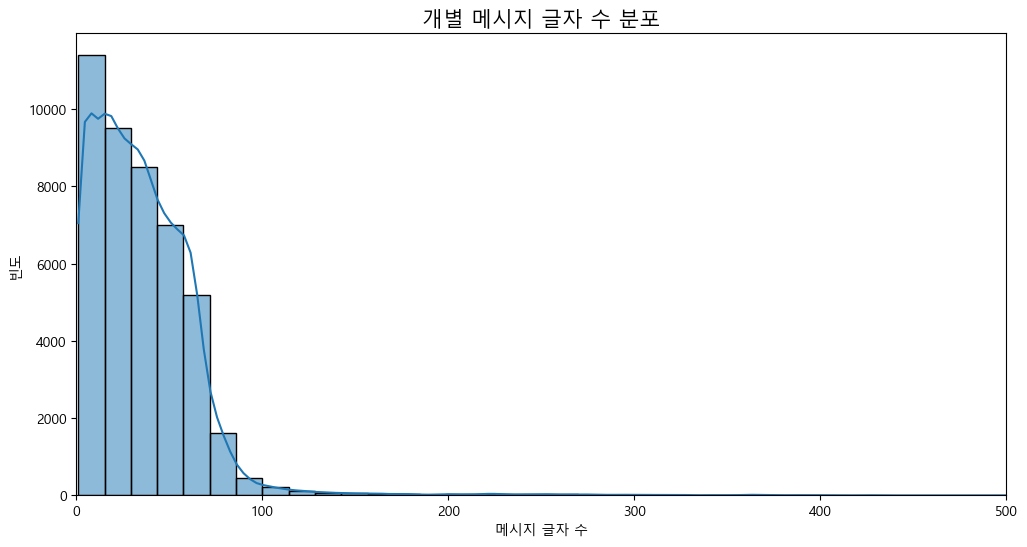

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="text_length", bins=50, kde=True) # 커널 밀도 추청곡선을 통해 데이터 집중 구간 확인
plt.title("개별 메시지 글자 수 분포", fontsize=15)
plt.xlabel("메시지 글자 수")
plt.ylabel("빈도")
plt.xlim(0, 500) # x축 범위를 조절하여 더 자세히 보고 싶을 때 사용
plt.show()

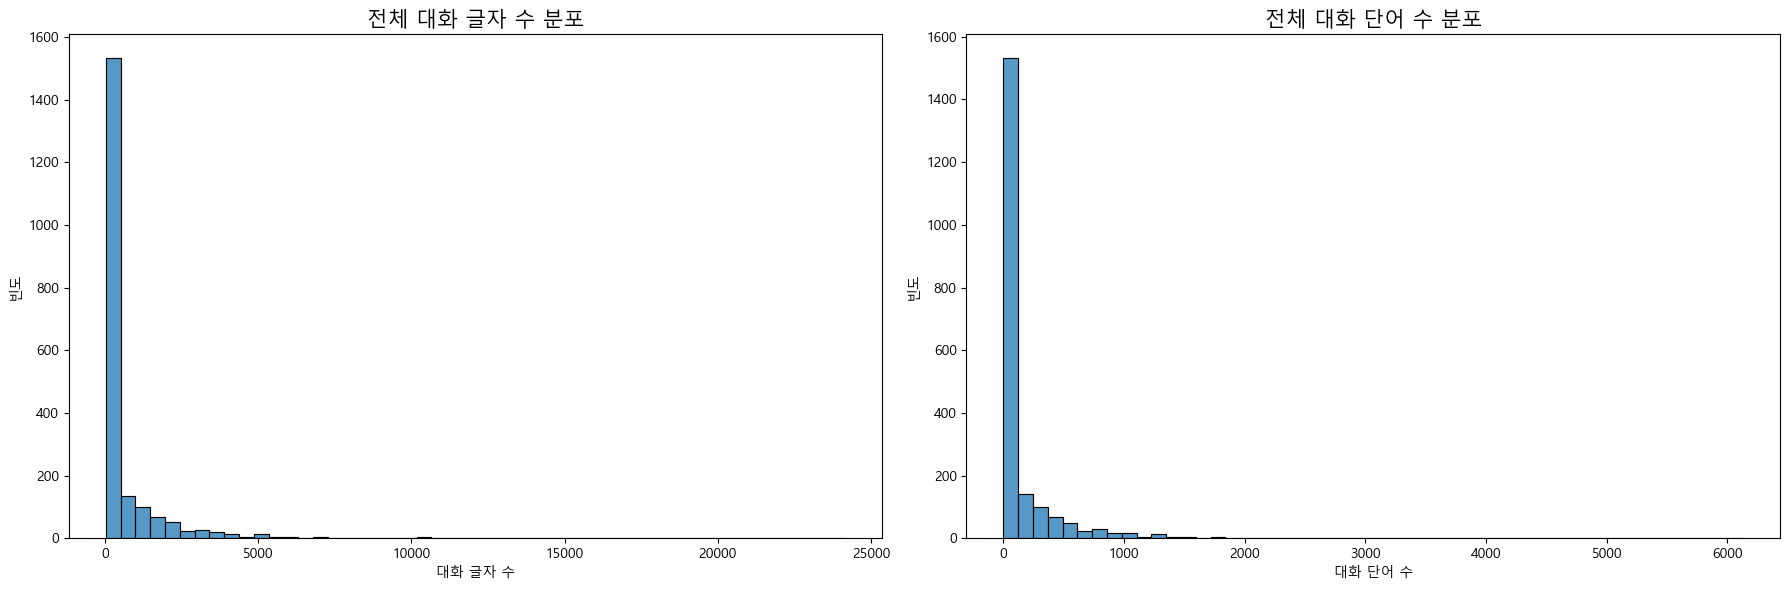

In [22]:
# 1개의 행, 2개의 열을 가진 그래프 영역 생성
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 전체 대화 글자 수 분포
sns.histplot(data=grouped_df, x="text_length", bins=50, ax=axes[0])
axes[0].set_title("전체 대화 글자 수 분포", fontsize=15)
axes[0].set_xlabel("대화 글자 수")
axes[0].set_ylabel("빈도")

# 두 번째 그래프: 전체 대화 단어 수 분포
sns.histplot(data=grouped_df, x="word_count", bins=50, ax=axes[1])
axes[1].set_title("전체 대화 단어 수 분포", fontsize=15)
axes[1].set_xlabel("대화 단어 수")
axes[1].set_ylabel("빈도")

plt.tight_layout()  # 그래프 간격 조절
plt.show()

### 대화길이 이상치 탐색

In [23]:
# 확인할 백분위수 목록
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

print("--- 전체 대화 길이 상세 백분율 ---")
detailed_percentiles = grouped_df["text_length"].describe(percentiles=percentiles)
print(detailed_percentiles)

--- 전체 대화 길이 상세 백분율 ---
count     2047.000000
mean       805.695652
std       1949.092858
min         20.000000
1%          67.000000
5%          80.000000
10%         89.600000
25%        122.000000
50%        192.000000
75%        516.500000
90%       1984.600000
95%       3477.000000
99%      11226.420000
max      24172.000000
Name: text_length, dtype: float64


In [ ]:
# 대화 길이에 대한 Q1, Q3, IQR 다시 계산
Q1 = grouped_df["text_length"].quantile(0.25)
Q3 = grouped_df["text_length"].quantile(0.75)
IQR = Q3 - Q1

# 극단적 이상치의 상단 경계 계산 (Q3 + 3.0 * IQR)
upper_bound_extreme = Q3 + 3.0 * IQR

print(f"일반 이상치 경계 (1.5*IQR): > {Q3 + 1.5 * IQR:.2f}")
print(f"극단적 이상치 경계 (3.0*IQR): > {upper_bound_extreme:.2f}")

# 극단적 이상치에 해당하는 데이터 추출
extreme_outliers = grouped_df[grouped_df["text_length"] > upper_bound_extreme]

print(
    f"\n총 {len(grouped_df)}개의 대화 중 {len(extreme_outliers)}개의 극단적 이상치 대화를 찾았습니다."
)

# 가장 길이가 긴 극단적 이상치 5개를 확인
print("\n--- 가장 긴 극단적 이상치 대화 (상위 5개) ---")
extreme_outliers.sort_values(by="text_length", ascending=False).head()

일반 이상치 경계 (1.5*IQR): > 1108.25
극단적 이상치 경계 (3.0*IQR): > 1700.00

총 2047개의 대화 중 239개의 극단적 이상치 대화를 찾았습니다.

--- 가장 긴 극단적 이상치 대화 (상위 5개) ---


,file_name,text,phishing_type,text_length,word_count
824,phishing_1659,"네, 근데 이미 확인하셨었는데 확인하셨어요, 그럼 바꿔주세요, 네. 이거는 그냥 받...",기관사칭형,24172,6129
1030,phishing_1846,"했어요, 어디요? 다시 한 번만요. 사실 있는 그대로만 말씀해달란 말이에요. 네, ...",기관사칭형,19229,4860
808,phishing_1644,소환장이란 것은 그래습다. 아까 내가 말씀드린 피해자가 너무 많은 관계로 님 한 분...,기관사칭형,18356,4670
947,phishing_1770,"어, 저희야 야구 선재 아니고. 조사하는데 제가 거래했던 거기에 네, 뭐 이렇게 같...",기관사칭형,18280,4726
800,phishing_1637,잠시만요. 제가 지금 커피숍에서 혼자 지금 과제를 하고 있었어가지고. 커피숍 안에 ...,기관사칭형,18100,4586


In [ ]:
# 'extreme_outliers' 데이터프레임을 CSV 파일로 저장합니다.
# 파일 이름은 'extreme_outliers.csv'로 지정합니다.
extreme_outliers.to_csv("extreme_outliers.csv", index=False, encoding="utf-8-sig")

# (선택) 전체 대화 데이터도 저장해두면 유용합니다.
# grouped_df.to_csv('all_conversations.csv', index=False, encoding='utf-8-sig')

print("'extreme_outliers.csv' 파일 저장이 완료되었습니다.")

'extreme_outliers.csv' 파일 저장이 완료되었습니다.


### 피싱유형별 데이터 탐색 후 극단적 이상치 분류

전체 대화 수: 2047
- 정상 대화 수: 1808 (88.32%)
- 극단적 이상치 대화 수: 239 (11.68%)


C:\Users\user\AppData\Local\Temp\ipykernel_20148\392728353.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlier_counts.index, y=outlier_counts.values, palette="viridis")


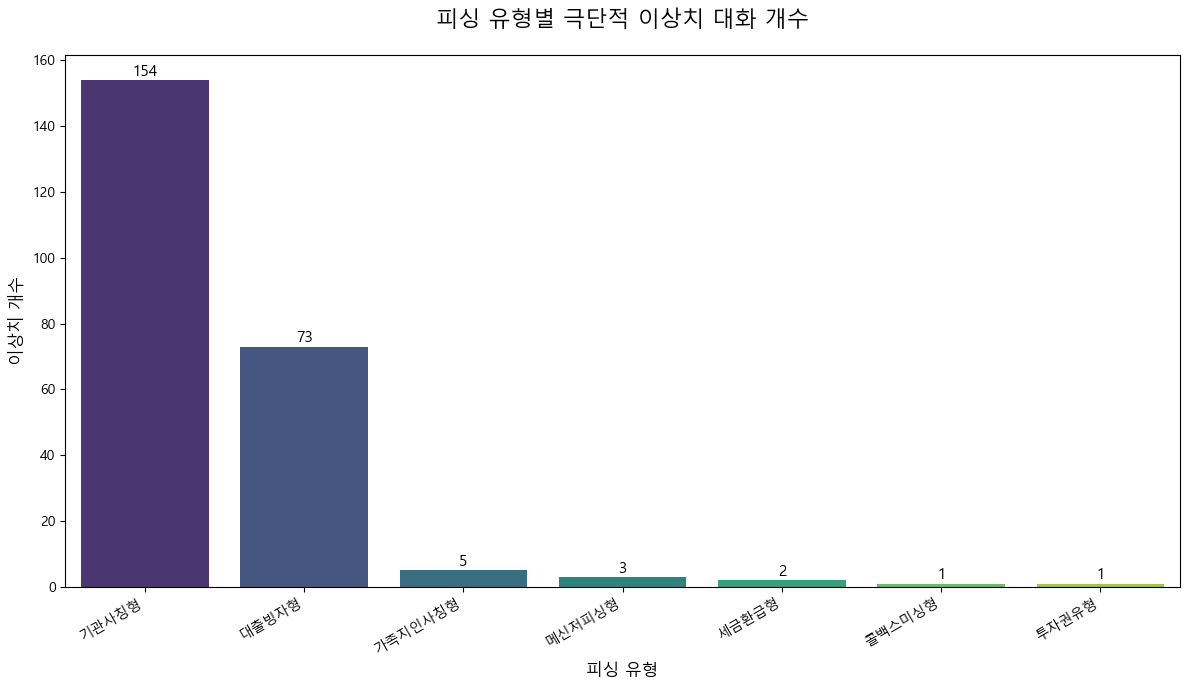

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    plt.rcParams["font.family"] = "Malgun Gothic"
except:
    plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False


# 1. 피싱 유형별로 극단적 이상치의 개수를 셉니다.
outlier_counts = extreme_outliers["phishing_type"].value_counts()

# 2. 전체 데이터 개수와 이상치 개수를 비교하여 출력합니다.
total_count = len(grouped_df)
extreme_outlier_count = len(extreme_outliers)
normal_count = total_count - extreme_outlier_count

print(f"전체 대화 수: {total_count}")
print(f"- 정상 대화 수: {normal_count} ({normal_count/total_count:.2%})")
print(
    f"- 극단적 이상치 대화 수: {extreme_outlier_count} ({extreme_outlier_count/total_count:.2%})"
)


# 3. 막대그래프로 시각화합니다.
plt.figure(figsize=(12, 7))
sns.barplot(x=outlier_counts.index, y=outlier_counts.values, palette="viridis")

plt.title("피싱 유형별 극단적 이상치 대화 개수", fontsize=16, pad=20)
plt.xlabel("피싱 유형", fontsize=12)
plt.ylabel("이상치 개수", fontsize=12)
plt.xticks(rotation=30, ha="right")  # x축 라벨이 겹치지 않도록 회전

# 막대 위에 개수를 표시합니다.
for i, count in enumerate(outlier_counts.values):
    plt.text(i, count + 0.1, str(count), ha="center", va="bottom", fontsize=11)

plt.tight_layout()  # 그래프 간격 자동 조절
plt.show()

In [27]:
df = pd.read_csv("phishing_data.csv")
print(f"초기 원본 데이터 개수: {len(df)}")

# 원본에서 text가 비어있는 행 삭제
df.dropna(subset=["text"], inplace=True)
print(f"빈 행 삭제 후 데이터 개수: {len(df)}")

# 개별 메시지(df)에 대한 분석 컬럼 생성
df["text_length"] = df["text"].str.len()
df["word_count"] = df["text"].str.split().str.len()

# file_name 기준으로 그룹화하여 대화 단위 데이터 생성
grouped_df = (
    df.groupby("file_name")
    .agg({"text": " ".join, "phishing_type": "first"})
    .reset_index()
)
print(f"\n재구성된 대화 단위 데이터 개수: {len(grouped_df)}")

# 대화 단위(grouped_df)에 대한 분석 컬럼 생성
grouped_df["text_length"] = grouped_df["text"].str.len()
grouped_df["word_count"] = grouped_df["text"].str.split().str.len()

print("\n데이터 준비 완료. `df`와 `grouped_df`가 생성되었습니다.")

초기 원본 데이터 개수: 44519
빈 행 삭제 후 데이터 개수: 44519

재구성된 대화 단위 데이터 개수: 2047

데이터 준비 완료. `df`와 `grouped_df`가 생성되었습니다.



[유형: 가족지인사칭형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
       text_length   word_count
count  1458.000000  1458.000000
mean     32.830590     8.513717
std      19.497235     5.248147
min       1.000000     1.000000
25%      19.000000     5.000000
50%      29.000000     7.000000
75%      45.000000    12.000000
max     114.000000    32.000000

--- 2.2. 전체 대화 요약 ---
       text_length   word_count
count    125.00000   125.000000
mean     393.60000    99.304000
std     1115.19633   282.013333
min       63.00000    16.000000
25%      126.00000    30.000000
50%      139.00000    32.000000
75%      155.00000    38.000000
max    10588.00000  2611.000000


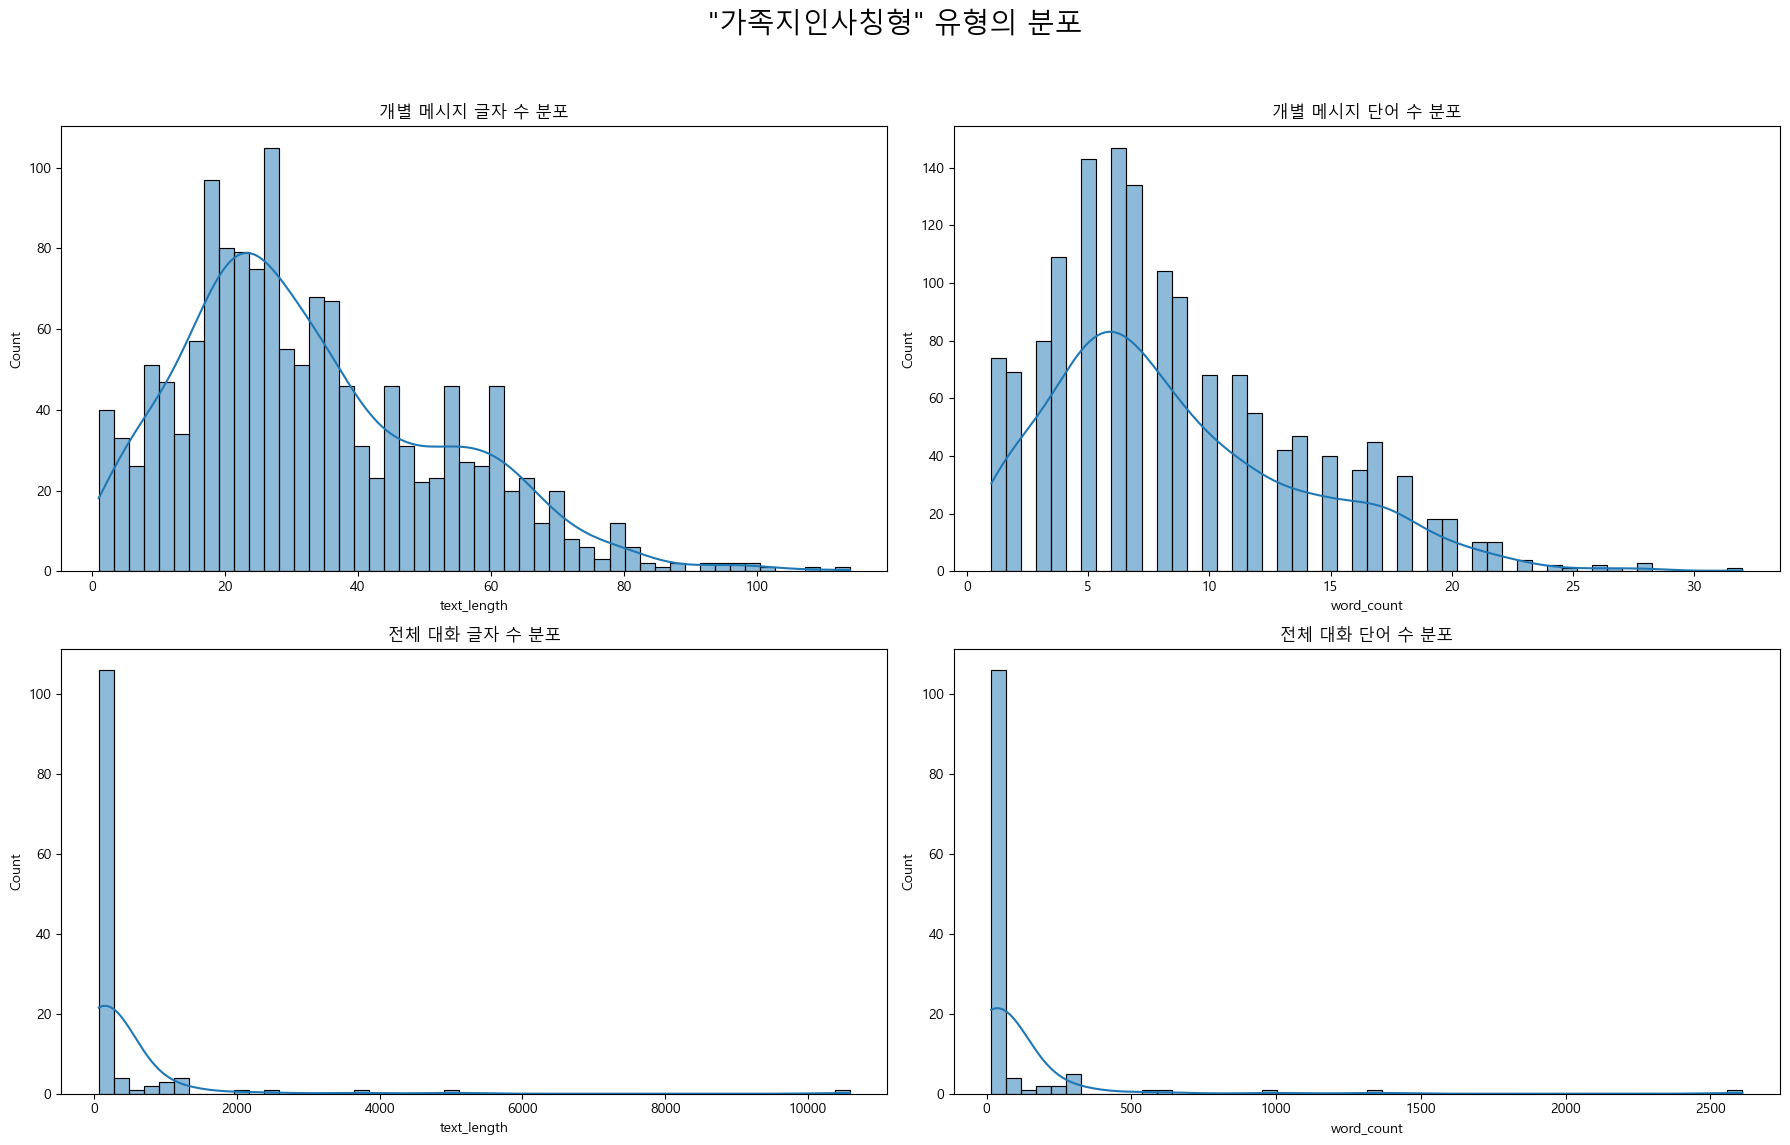


--- 4. 대화 길이 상세 백분율 ---
count      125.00000
mean       393.60000
std       1115.19633
min         63.00000
1%          69.64000
5%         106.60000
10%        114.20000
25%        126.00000
50%        139.00000
75%        155.00000
90%        798.20000
95%       1154.20000
99%       4707.68000
max      10588.00000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 198.50
 -> 21개 탐지
극단적 이상치(3.0*IQR) 경계: > 242.00
 -> 19개 탐지

[유형: 기관사칭형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
        text_length    word_count
count  27741.000000  27741.000000
mean      36.733607      9.427923
std       32.677739      8.391272
min        1.000000      1.000000
25%       15.000000      4.000000
50%       33.000000      8.000000
75%       53.000000     13.000000
max      708.000000    186.000000

--- 2.2. 전체 대화 요약 ---
        text_length   word_count
count    857.000000   857.000000
mean    1220.469078   305.191365
std     2698.401423   687.879909
min       20.000000     3.000000
25% 

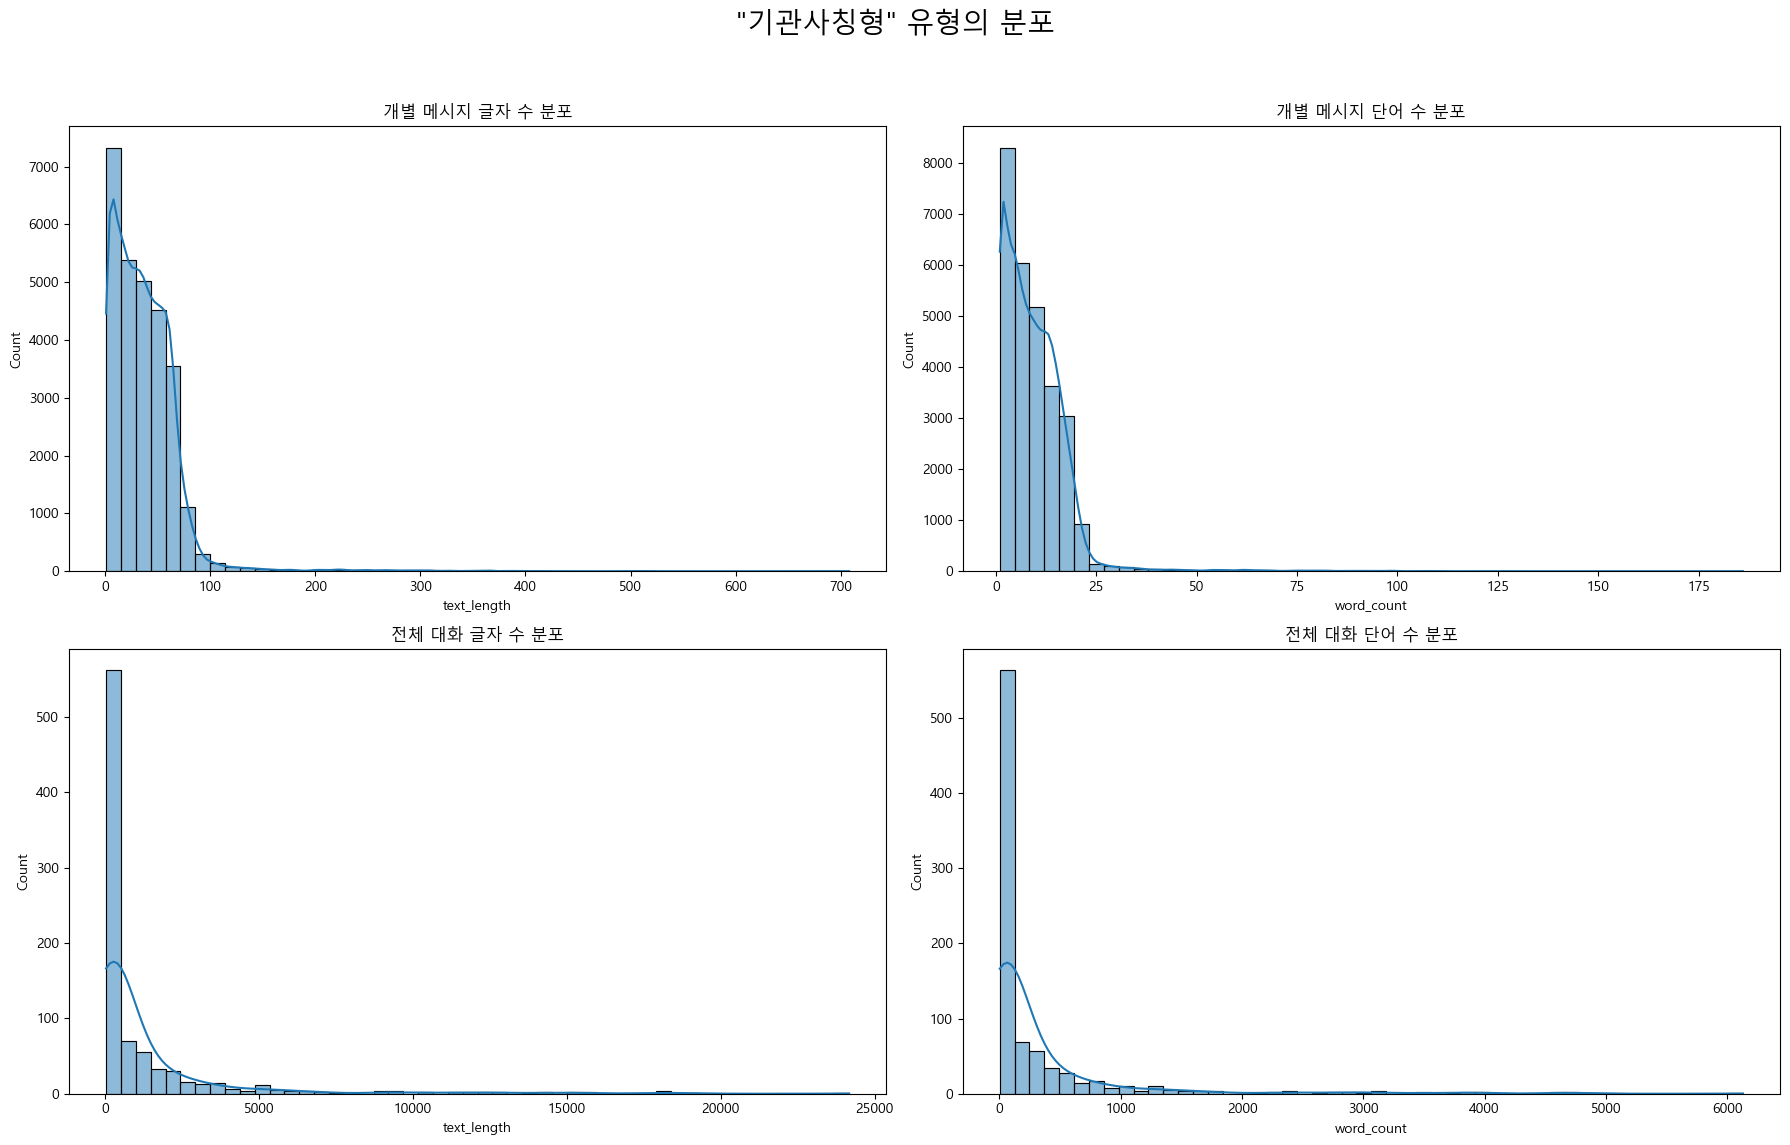


--- 4. 대화 길이 상세 백분율 ---
count      857.000000
mean      1220.469078
std       2698.401423
min         20.000000
1%          64.360000
5%          80.000000
10%         88.000000
25%        116.000000
50%        211.000000
75%       1058.000000
90%       3061.600000
95%       5286.000000
99%      15074.360000
max      24172.000000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 2471.00
 -> 103개 탐지
극단적 이상치(3.0*IQR) 경계: > 3884.00
 -> 64개 탐지

[유형: 세금환급형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
       text_length  word_count
count   861.000000  861.000000
mean     35.591173    8.296167
std      17.460257    4.720253
min       1.000000    1.000000
25%      21.000000    5.000000
50%      35.000000    8.000000
75%      46.000000   10.000000
max     111.000000   31.000000

--- 2.2. 전체 대화 요약 ---
       text_length   word_count
count   105.000000   105.000000
mean    299.047619    68.028571
std     816.787591   218.996420
min     150.000000    28.000000
25%     179.000000 

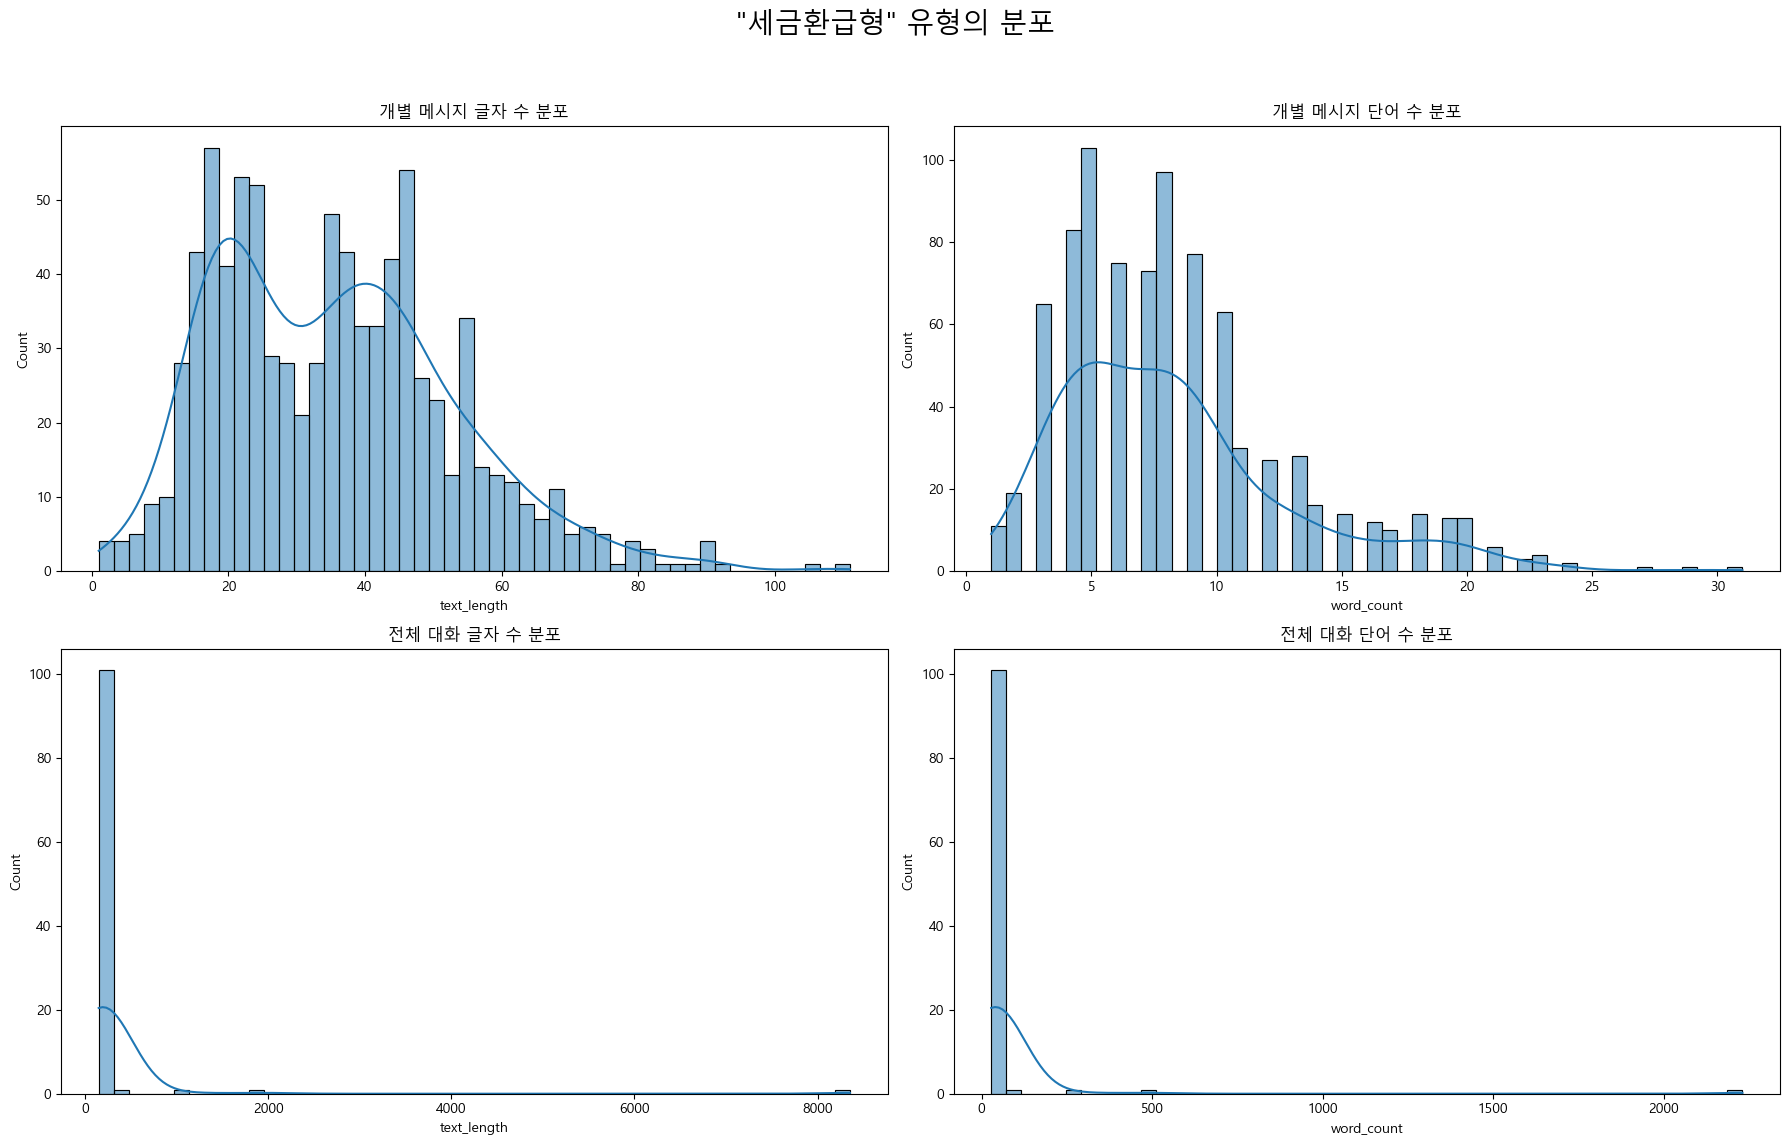


--- 4. 대화 길이 상세 백분율 ---
count     105.000000
mean      299.047619
std       816.787591
min       150.000000
1%        151.080000
5%        157.600000
10%       169.400000
25%       179.000000
50%       193.000000
75%       206.000000
90%       235.200000
95%       253.800000
99%      1905.960000
max      8354.000000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 246.50
 -> 7개 탐지
극단적 이상치(3.0*IQR) 경계: > 287.00
 -> 4개 탐지

[유형: 대출빙자형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
        text_length    word_count
count  10734.000000  10734.000000
mean      36.930035      9.529998
std       36.909718      9.585366
min        1.000000      1.000000
25%       13.000000      3.000000
50%       31.000000      8.000000
75%       53.000000     13.000000
max      543.000000    133.000000

--- 2.2. 전체 대화 요약 ---
        text_length   word_count
count    431.000000   431.000000
mean     943.570766   237.322506
std     1328.289340   342.816956
min       23.000000     6.000000
25%   

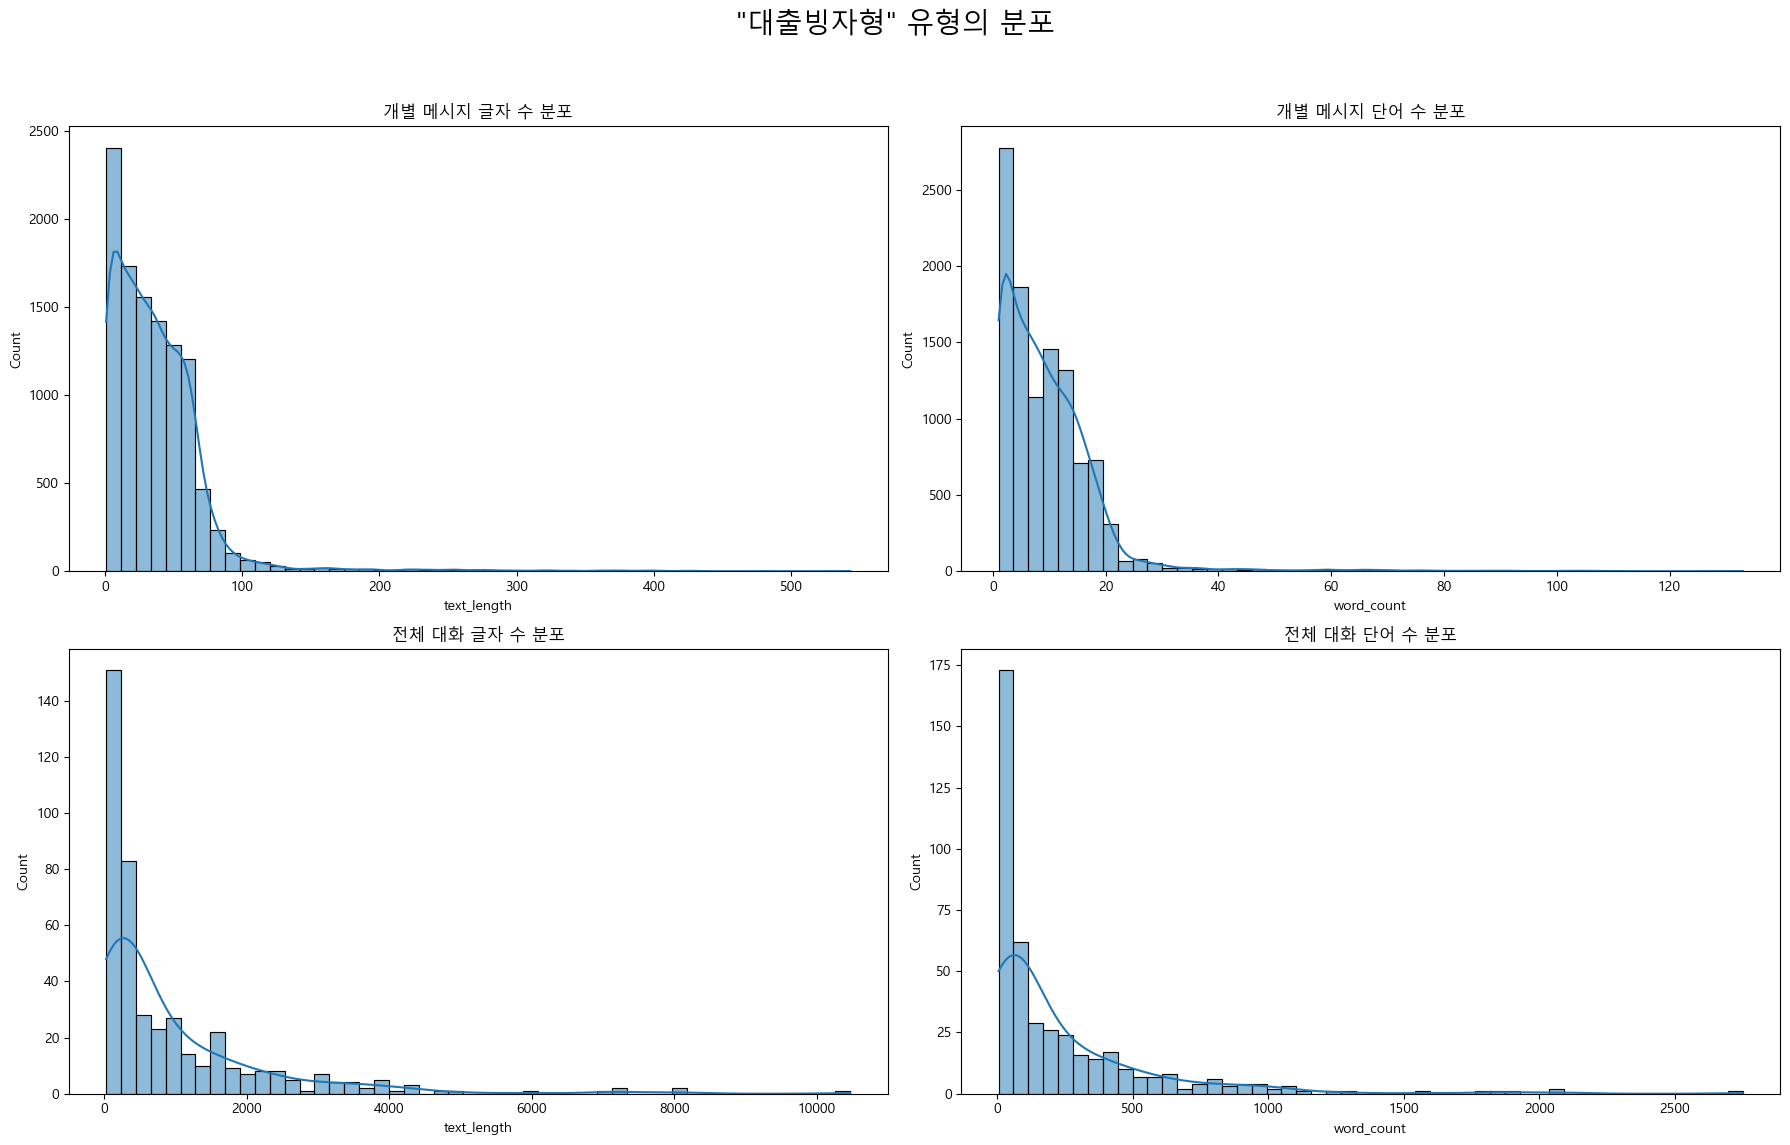


--- 4. 대화 길이 상세 백분율 ---
count      431.000000
mean       943.570766
std       1328.289340
min         23.000000
1%          44.300000
5%          83.000000
10%         97.000000
25%        139.000000
50%        354.000000
75%       1237.500000
90%       2415.000000
95%       3527.000000
99%       7128.100000
max      10473.000000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 2885.25
 -> 36개 탐지
극단적 이상치(3.0*IQR) 경계: > 4533.00
 -> 9개 탐지

[유형: 메신저피싱형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
       text_length   word_count
count  1137.000000  1137.000000
mean     30.943712     7.262093
std      15.111918     3.985879
min       2.000000     1.000000
25%      20.000000     5.000000
50%      29.000000     7.000000
75%      39.000000     9.000000
max     135.000000    37.000000

--- 2.2. 전체 대화 요약 ---
       text_length  word_count
count   168.000000   168.00000
mean    215.190476    49.14881
std     368.963136    94.78988
min      47.000000    11.00000
25%      95.7500

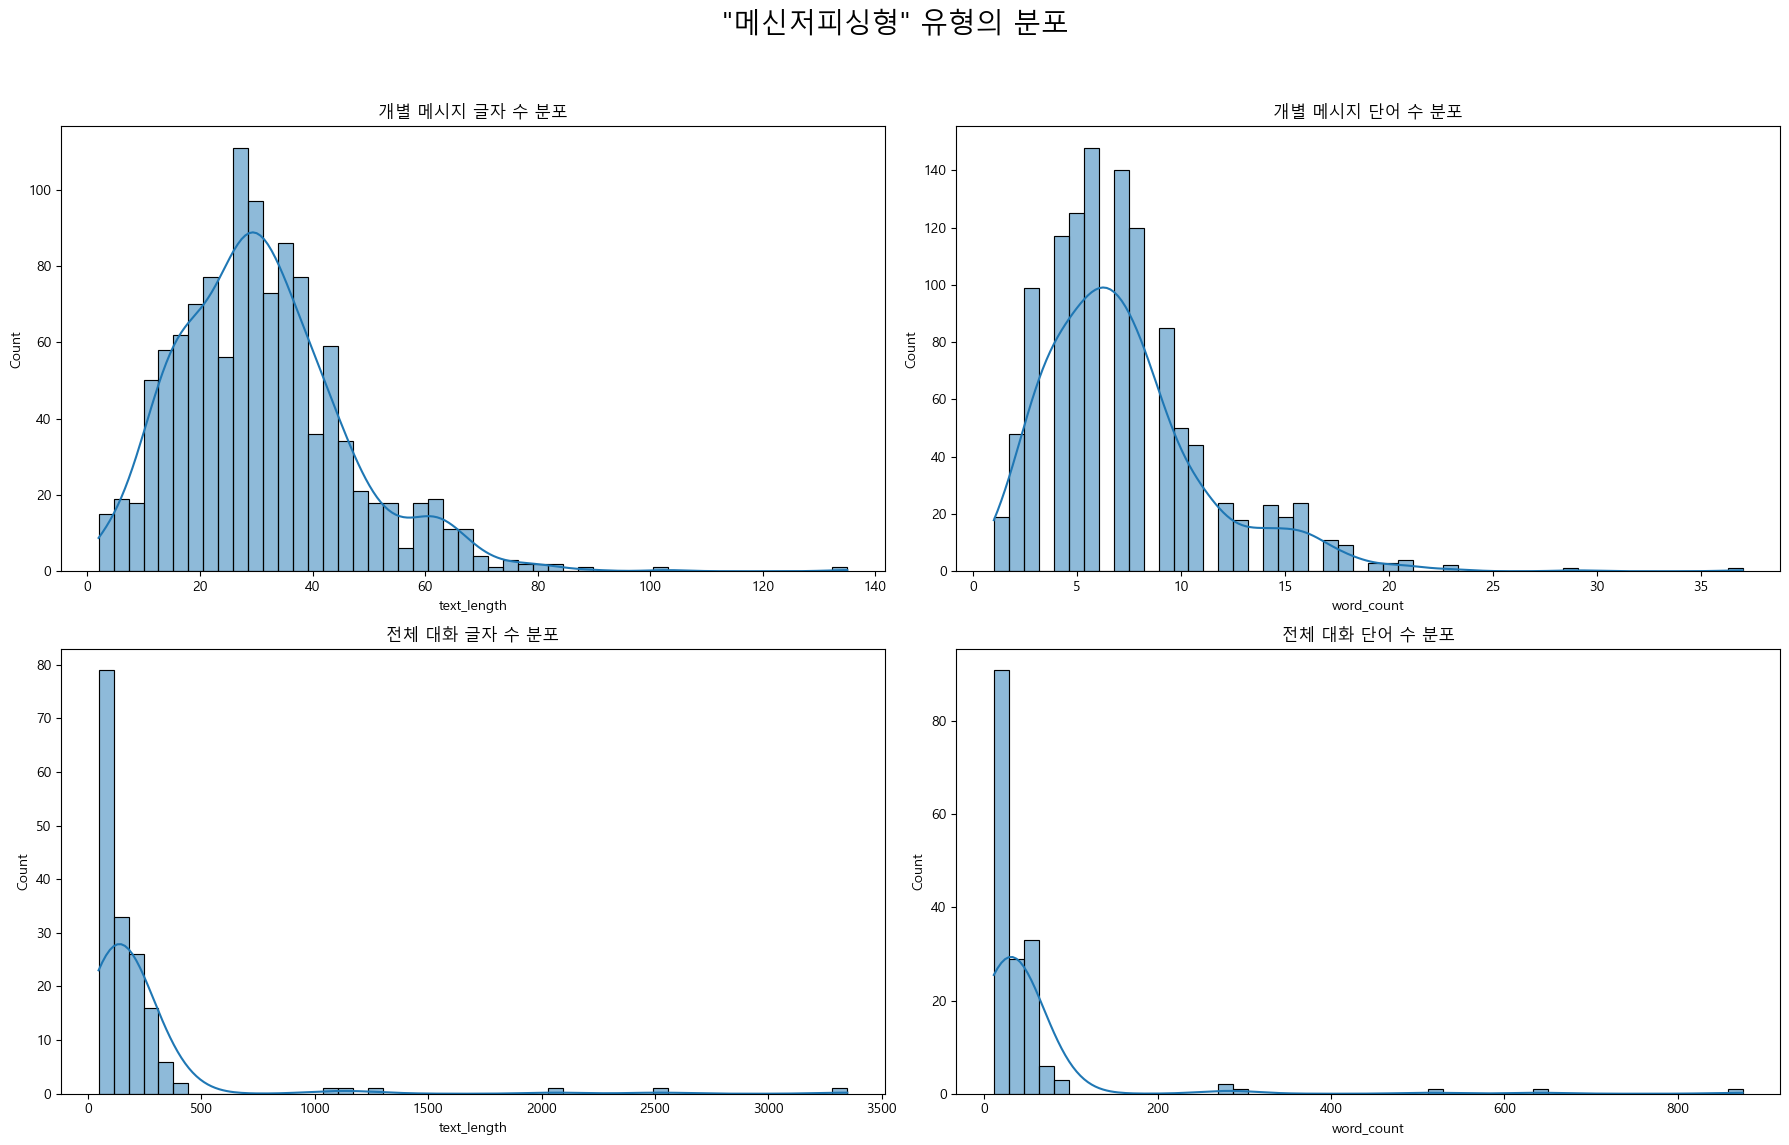


--- 4. 대화 길이 상세 백분율 ---
count     168.000000
mean      215.190476
std       368.963136
min        47.000000
1%         67.680000
5%         77.000000
10%        82.000000
25%        95.750000
50%       119.500000
75%       225.000000
90%       278.500000
95%       373.850000
99%      2213.480000
max      3348.000000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 418.88
 -> 6개 탐지
극단적 이상치(3.0*IQR) 경계: > 612.75
 -> 6개 탐지

[유형: 택배사칭형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
       text_length  word_count
count   876.000000  876.000000
mean     28.207763    6.325342
std      10.537996    2.512660
min       7.000000    2.000000
25%      21.000000    4.000000
50%      28.000000    6.000000
75%      35.000000    8.000000
max      72.000000   18.000000

--- 2.2. 전체 대화 요약 ---
       text_length  word_count
count   161.000000  161.000000
mean    157.919255   34.416149
std      96.201220   21.921895
min      61.000000   14.000000
25%      87.000000   19.000000
50%     105.

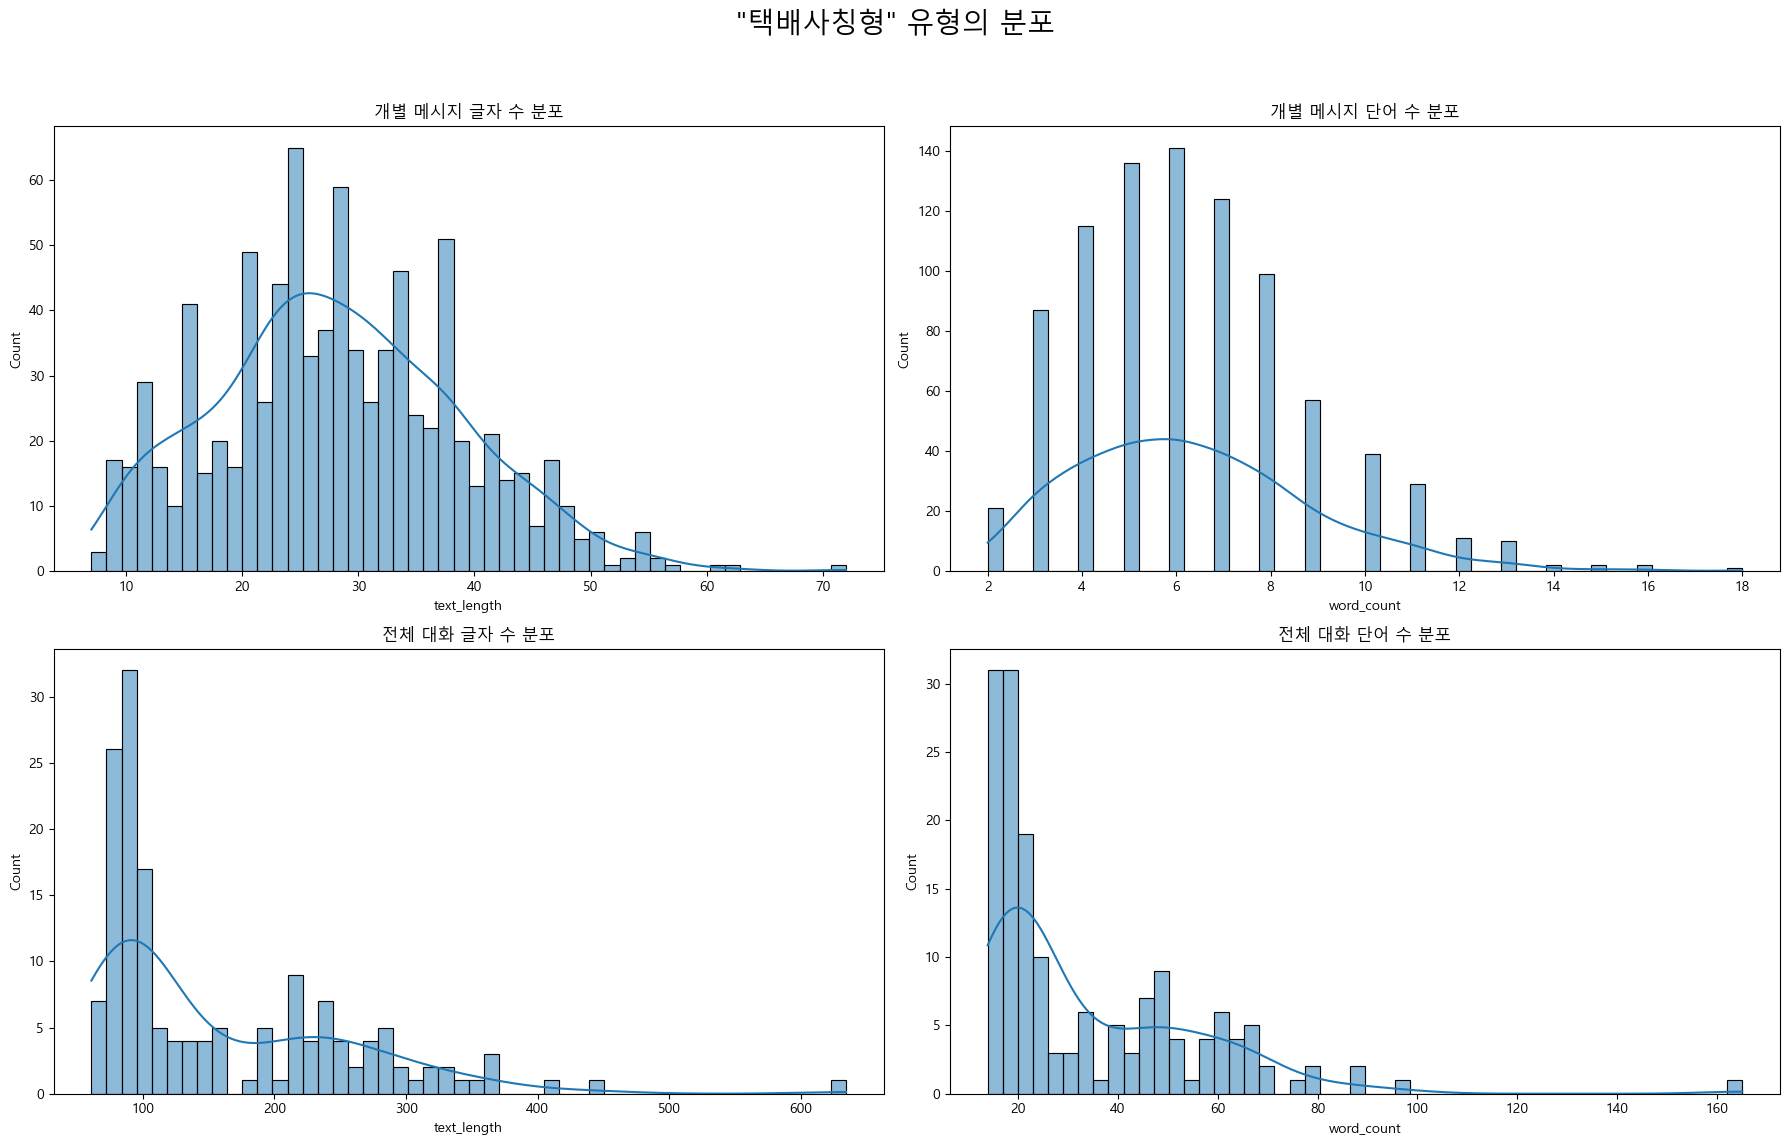


--- 4. 대화 길이 상세 백분율 ---
count    161.000000
mean     157.919255
std       96.201220
min       61.000000
1%        67.000000
5%        74.000000
10%       78.000000
25%       87.000000
50%      105.000000
75%      225.000000
90%      287.000000
95%      327.000000
99%      424.400000
max      634.000000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 432.00
 -> 2개 탐지
극단적 이상치(3.0*IQR) 경계: > 639.00
 -> 0개 탐지

[유형: 콜백스미싱형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
       text_length  word_count
count   820.000000  820.000000
mean     27.241463    6.485366
std      16.906631    4.643430
min       1.000000    1.000000
25%      15.000000    3.000000
50%      23.000000    5.000000
75%      38.000000    9.000000
max     208.000000   59.000000

--- 2.2. 전체 대화 요약 ---
       text_length  word_count
count   109.000000  109.000000
mean    211.458716   48.788991
std     260.541620   70.224913
min      80.000000   19.000000
25%     152.000000   33.000000
50%     166.000000   36.0

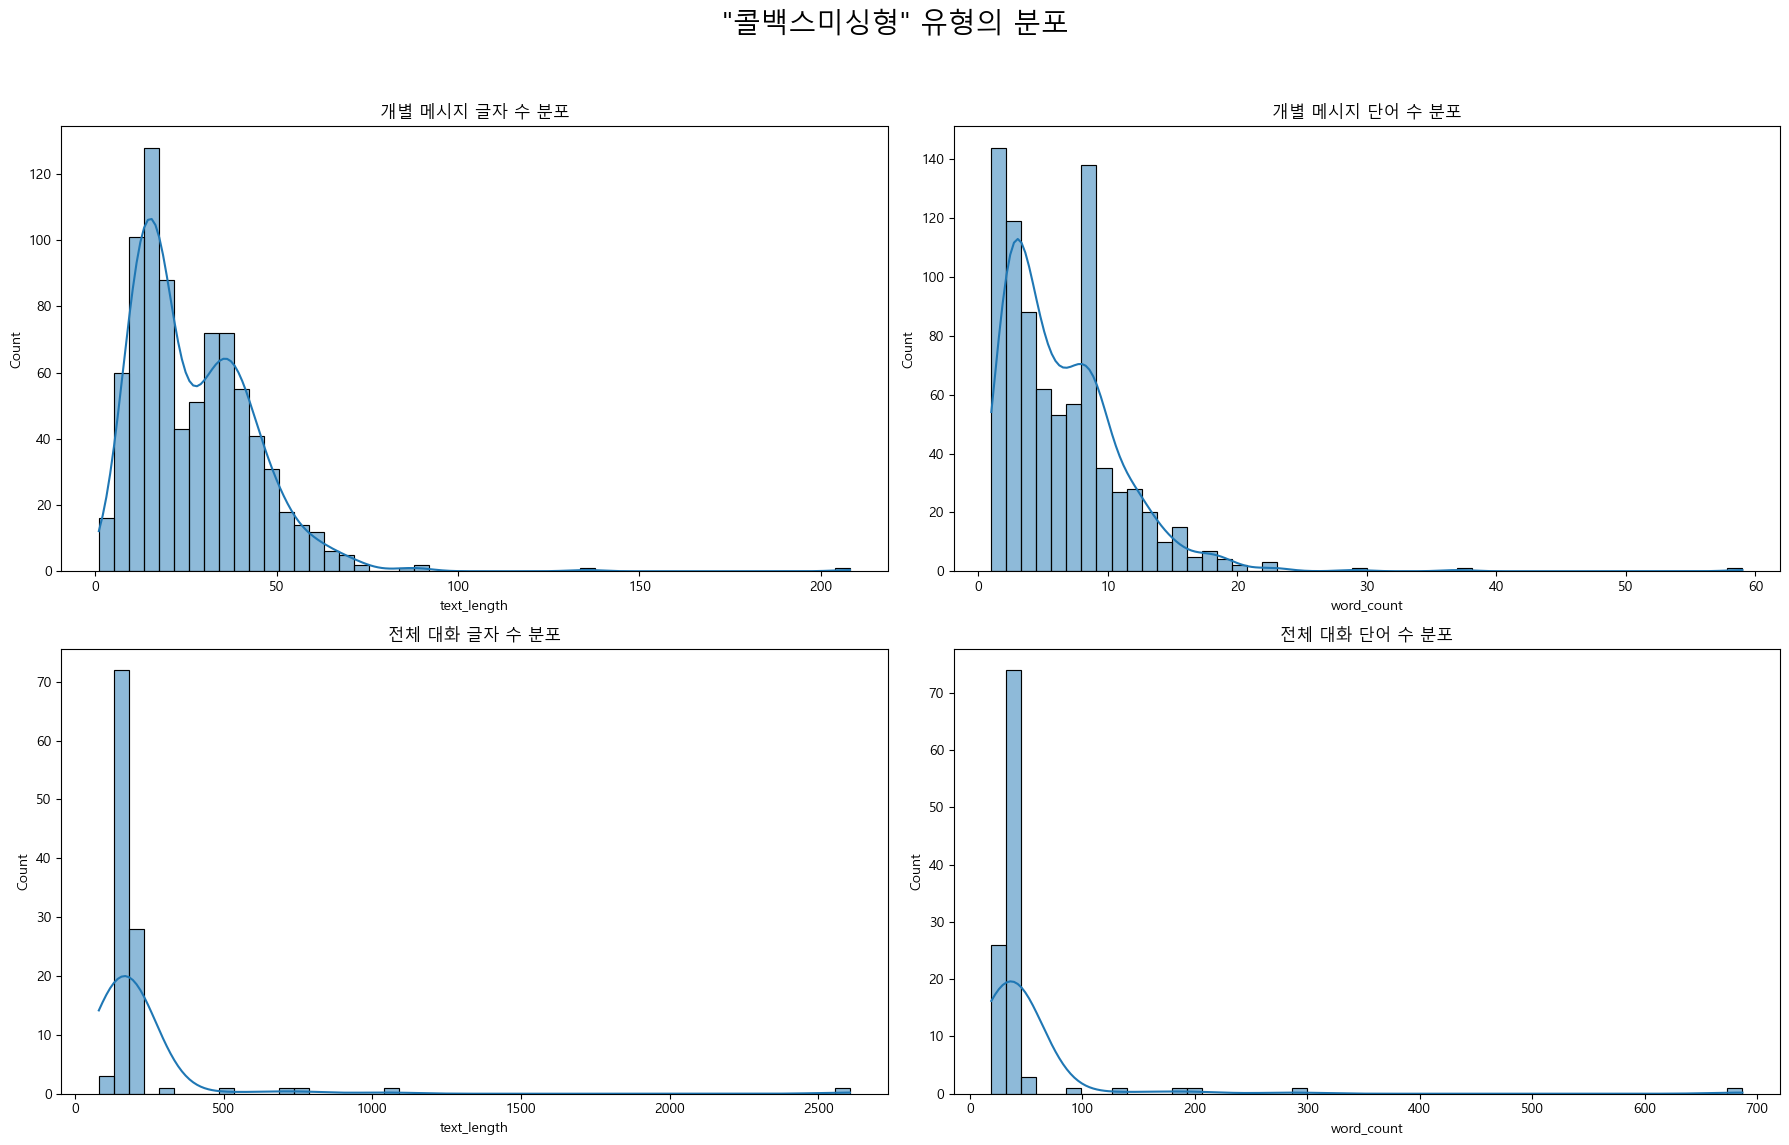


--- 4. 대화 길이 상세 백분율 ---
count     109.000000
mean      211.458716
std       260.541620
min        80.000000
1%        124.480000
5%        136.400000
10%       143.800000
25%       152.000000
50%       166.000000
75%       184.000000
90%       201.400000
95%       272.600000
99%      1020.440000
max      2607.000000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 232.00
 -> 6개 탐지
극단적 이상치(3.0*IQR) 경계: > 280.00
 -> 6개 탐지

[유형: 투자권유형] 분석 시작

--- 2.1. 개별 메시지 요약 ---
       text_length  word_count
count   892.000000  892.000000
mean     34.317265    8.042601
std      19.249534    4.586172
min       1.000000    1.000000
25%      17.000000    4.000000
50%      34.000000    8.000000
75%      51.000000   12.000000
max      95.000000   23.000000

--- 2.2. 전체 대화 요약 ---
        text_length   word_count
count     91.000000    91.000000
mean     345.186813    78.835165
std     1239.507661   303.906428
min      139.000000    34.000000
25%      188.000000    39.000000


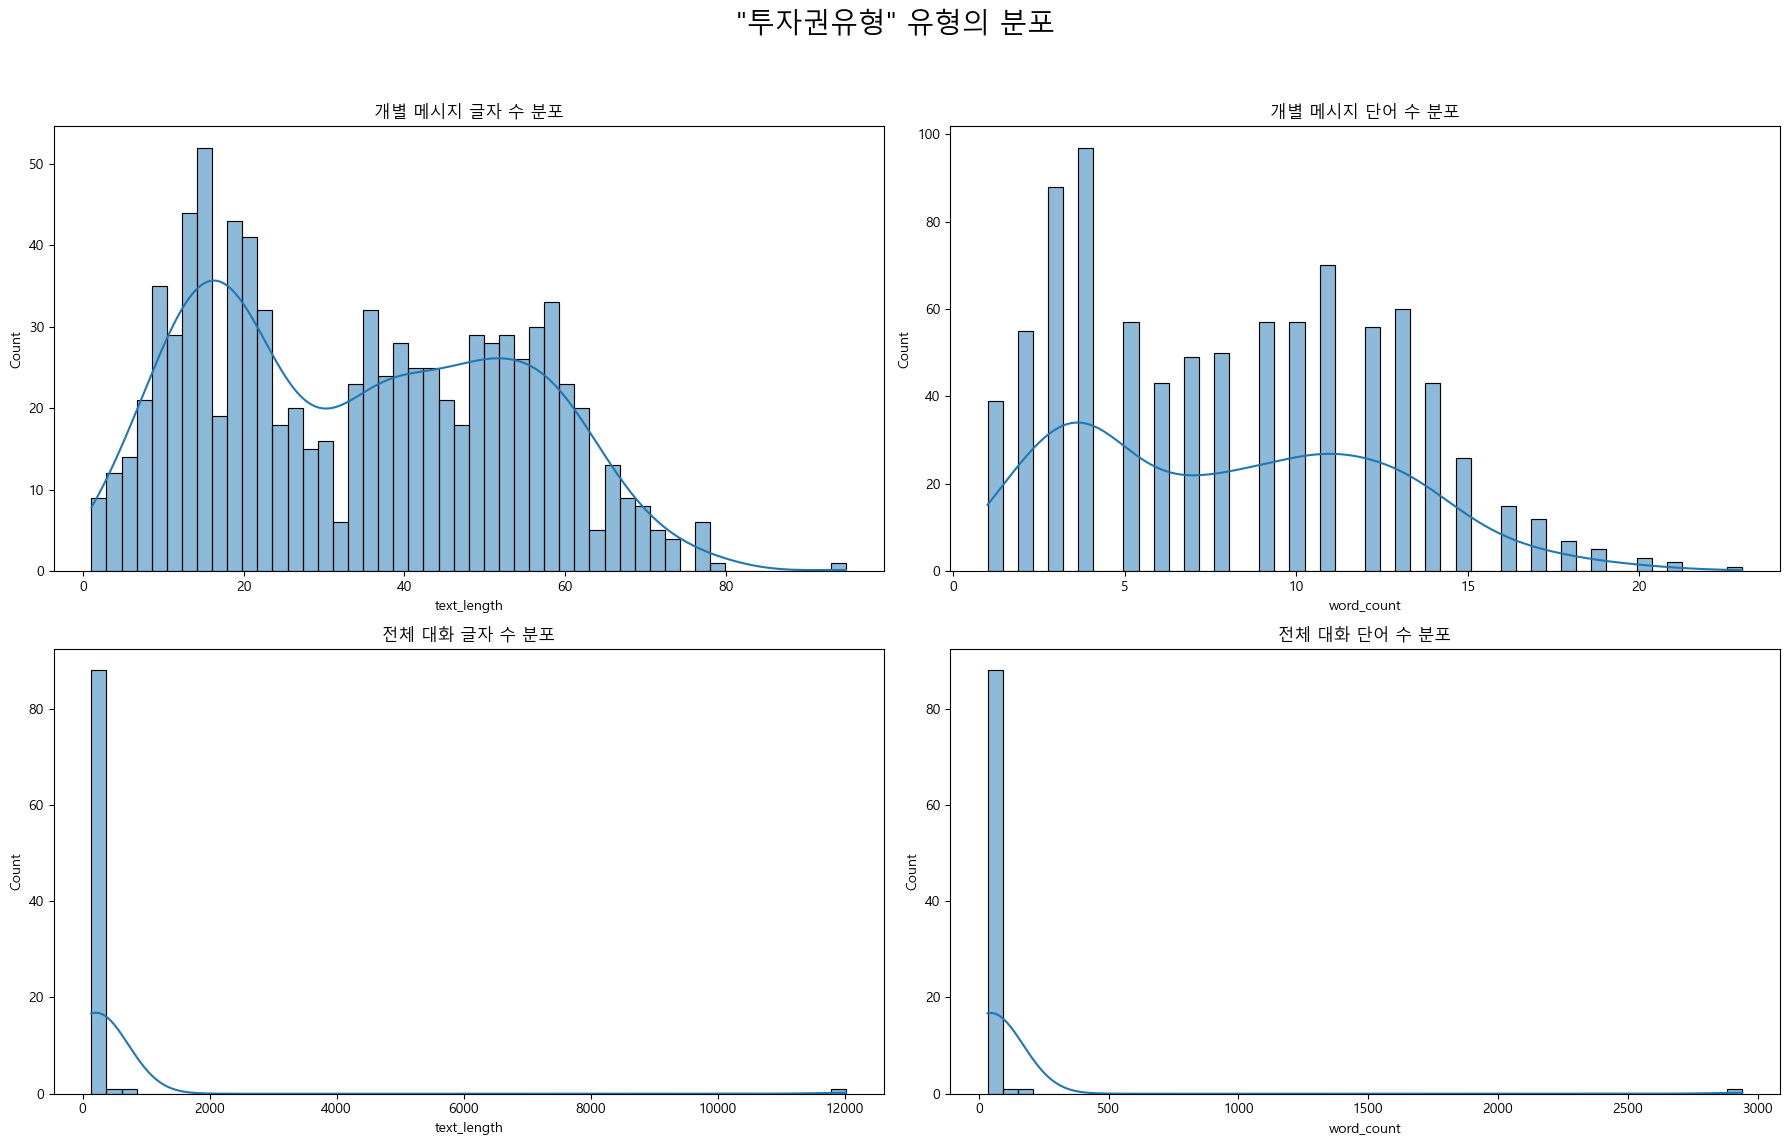


--- 4. 대화 길이 상세 백분율 ---
count       91.000000
mean       345.186813
std       1239.507661
min        139.000000
1%         166.000000
5%         177.000000
10%        180.000000
25%        188.000000
50%        204.000000
75%        218.000000
90%        252.000000
95%        287.500000
99%       1847.500000
max      12022.000000
Name: text_length, dtype: float64

--- 5. 대화 길이 이상치 탐지 ---
일반 이상치(1.5*IQR) 경계: > 263.00
 -> 7개 탐지
극단적 이상치(3.0*IQR) 경계: > 308.00
 -> 3개 탐지


모든 유형에 대한 분석이 완료되었습니다.


In [29]:
# 분석 결과를 저장할 빈 리스트 생성
all_extreme_outliers = []

# 모든 피싱 유형 목록 가져오기
unique_types = grouped_df["phishing_type"].unique()

# 각 피싱 유형에 대해 반복 실행
for p_type in unique_types:
    print("\n" + "=" * 80)
    print(f"[유형: {p_type}] 분석 시작")
    print("=" * 80)

    # 1. 현재 유형에 해당하는 데이터만 필터링
    df_type = df[df["phishing_type"] == p_type]
    grouped_df_type = grouped_df[grouped_df["phishing_type"] == p_type]

    # 2. 변수 요약
    print("\n--- 2.1. 개별 메시지 요약 ---")
    print(df_type[["text_length", "word_count"]].describe())
    print("\n--- 2.2. 전체 대화 요약 ---")
    print(grouped_df_type[["text_length", "word_count"]].describe())

    # 3. 분포 시각화 (문장/대화, 글자수/단어수)
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(f'"{p_type}" 유형의 분포', fontsize=20)

    sns.histplot(
        data=df_type, x="text_length", bins=50, kde=True, ax=axes[0, 0]
    ).set_title("개별 메시지 글자 수 분포")
    sns.histplot(
        data=df_type, x="word_count", bins=50, kde=True, ax=axes[0, 1]
    ).set_title("개별 메시지 단어 수 분포")
    sns.histplot(
        data=grouped_df_type, x="text_length", bins=50, kde=True, ax=axes[1, 0]
    ).set_title("전체 대화 글자 수 분포")
    sns.histplot(
        data=grouped_df_type, x="word_count", bins=50, kde=True, ax=axes[1, 1]
    ).set_title("전체 대화 단어 수 분포")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # 4. 대화 길이 상세 백분율
    print("\n--- 4. 대화 길이 상세 백분율 ---")
    percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    print(grouped_df_type["text_length"].describe(percentiles=percentiles))

    # 5. IQR 기반 이상치 탐지 (일반/극단적)
    print("\n--- 5. 대화 길이 이상치 탐지 ---")
    Q1 = grouped_df_type["text_length"].quantile(0.25)
    Q3 = grouped_df_type["text_length"].quantile(0.75)
    IQR = Q3 - Q1

    # 일반 이상치 (1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    outliers = grouped_df_type[grouped_df_type["text_length"] > upper_bound]
    print(f"일반 이상치(1.5*IQR) 경계: > {upper_bound:.2f}")
    print(f" -> {len(outliers)}개 탐지")

    # 극단적 이상치 (3.0 * IQR)
    upper_bound_extreme = Q3 + 3.0 * IQR
    extreme_outliers = grouped_df_type[
        grouped_df_type["text_length"] > upper_bound_extreme
    ]
    print(f"극단적 이상치(3.0*IQR) 경계: > {upper_bound_extreme:.2f}")
    print(f" -> {len(extreme_outliers)}개 탐지")

    # 결과 저장을 위해 리스트에 추가
    if not extreme_outliers.empty:
        all_extreme_outliers.append(extreme_outliers)

print("\n\n모든 유형에 대한 분석이 완료되었습니다.")

In [ ]:
# 모든 피싱 유형 목록 가져오기
unique_types = grouped_df["phishing_type"].unique()

# 각 피싱 유형에 대해 반복 실행
for p_type in unique_types:
    print("\n" + "=" * 80)
    print(f"[유형: {p_type}] 분석 시작")
    print("=" * 80)

    # 현재 유형에 해당하는 데이터만 필터링
    grouped_df_type = grouped_df[grouped_df["phishing_type"] == p_type]

    # (이전의 변수 요약, 분포 시각화, 백분율 분석 등은 여기에 그대로 들어갑니다)
    # ...

    # IQR 기반 극단적 이상치 탐지
    print(f"\n--- {p_type} 유형 이상치 탐지 ---")
    Q1 = grouped_df_type["text_length"].quantile(0.25)
    Q3 = grouped_df_type["text_length"].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound_extreme = Q3 + 3.0 * IQR
    extreme_outliers = grouped_df_type[
        grouped_df_type["text_length"] > upper_bound_extreme
    ]

    print(f"극단적 이상치 경계: > {upper_bound_extreme:.2f}")
    print(f" -> {len(extreme_outliers)}개 탐지")

    # [수정] 이상치가 있는 경우, 해당 유형의 이름으로 CSV 파일 저장
    if not extreme_outliers.empty:
        # 파일 이름 동적으로 생성 (예: extreme_outliers_기관사칭형.csv)
        file_name = f"extreme_outliers_{p_type}.csv"

        # CSV 파일로 저장
        extreme_outliers.to_csv(file_name, index=False, encoding="utf-8-sig")

        print(f"'{file_name}' 파일 저장 완료!")
    else:
        print(" -> 저장할 극단적 이상치가 없습니다.")

print("\n\n모든 유형에 대한 분석 및 개별 파일 저장이 완료되었습니다.")


[유형: 가족지인사칭형] 분석 시작

--- 가족지인사칭형 유형 이상치 탐지 ---
극단적 이상치 경계: > 242.00
 -> 19개 탐지
'extreme_outliers_가족지인사칭형.csv' 파일 저장 완료!

[유형: 기관사칭형] 분석 시작

--- 기관사칭형 유형 이상치 탐지 ---
극단적 이상치 경계: > 3884.00
 -> 64개 탐지
'extreme_outliers_기관사칭형.csv' 파일 저장 완료!

[유형: 세금환급형] 분석 시작

--- 세금환급형 유형 이상치 탐지 ---
극단적 이상치 경계: > 287.00
 -> 4개 탐지
'extreme_outliers_세금환급형.csv' 파일 저장 완료!

[유형: 대출빙자형] 분석 시작

--- 대출빙자형 유형 이상치 탐지 ---
극단적 이상치 경계: > 4533.00
 -> 9개 탐지
'extreme_outliers_대출빙자형.csv' 파일 저장 완료!

[유형: 메신저피싱형] 분석 시작

--- 메신저피싱형 유형 이상치 탐지 ---
극단적 이상치 경계: > 612.75
 -> 6개 탐지
'extreme_outliers_메신저피싱형.csv' 파일 저장 완료!

[유형: 택배사칭형] 분석 시작

--- 택배사칭형 유형 이상치 탐지 ---
극단적 이상치 경계: > 639.00
 -> 0개 탐지
 -> 저장할 극단적 이상치가 없습니다.

[유형: 콜백스미싱형] 분석 시작

--- 콜백스미싱형 유형 이상치 탐지 ---
극단적 이상치 경계: > 280.00
 -> 6개 탐지
'extreme_outliers_콜백스미싱형.csv' 파일 저장 완료!

[유형: 투자권유형] 분석 시작

--- 투자권유형 유형 이상치 탐지 ---
극단적 이상치 경계: > 308.00
 -> 3개 탐지
'extreme_outliers_투자권유형.csv' 파일 저장 완료!


모든 유형에 대한 분석 및 개별 파일 저장이 완료되었습니다.
